# 0. Install dependencies

In [ ]:
!pip install prophet

# 1. Install libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
from prophet import Prophet

# 2. Read the csv file

In [ ]:
# Reading in currency exchange rate data
exchange_rate_data = pd.read_csv('fx_fwd_rates_optimisation_data.csv')
exchange_rate_data

currency rate_type  length_in_months        date      rate
0          AUD  bid_rate                 3  2016-10-03  0.765318
1          AUD  bid_rate                 3  2016-10-04  0.760240
2          AUD  bid_rate                 3  2016-10-05  0.760531
3          AUD  bid_rate                 3  2016-10-06  0.756540
4          AUD  bid_rate                 3  2016-10-07  0.755847
...        ...       ...               ...         ...       ...
88000      ZMW  bid_rate                 3  2021-12-27  0.057945
88001      ZMW  bid_rate                 3  2021-12-28  0.057873
88002      ZMW  bid_rate                 3  2021-12-29  0.057788
88003      ZMW  bid_rate                 3  2021-12-30  0.057770
88004      ZMW  bid_rate                 3  2021-12-31  0.057703

[88005 rows x 5 columns]

## check whether the csv has 88005 rows × 5 columns

# 3. Loop over all the currencies and create a key for extracting the currency data

In [ ]:
columns = ['AUD', 'BGN', 'BHD', 'BRL', 'BWP', 'CAD', 'CHF', 'CLP', 'CNH', 'CNY', 'COP', 'CZK', 'DKK', 'EUR', 'GBP', 'GHS', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JOD', 'JPY', 'KES', 'KRW', 'KWD', 'MAD', 'MUR', 'MXN', 'MYR', 'NGN', 'NOK', 'NZD', 'OMR', 'PHP', 'PLN', 'QAR', 'RON', 'RSD', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TND', 'TRY', 'UGX', 'USD', 'XAF', 'XOF', 'ZAR', 'ZMW']

currency_rates = {}

# Loop over the currencies and filter the exchange rate data for each currency
for currency in columns:
    currency_rates[currency] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]


In [ ]:
# Loop over the currency columns and create a new variable for each one
for currency in columns:
    globals()[f"currency_rates_{currency}"] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]
    # print(currency)

# 4. Test code is on AUD, but feel free to optimise or change it

In [ ]:
currency_rates_AUD = currency_rates['AUD']
currency_rates_AUD

currency rate_type  length_in_months        date      rate
0         AUD  bid_rate                 3  2016-10-03  0.765318
1         AUD  bid_rate                 3  2016-10-04  0.760240
2         AUD  bid_rate                 3  2016-10-05  0.760531
3         AUD  bid_rate                 3  2016-10-06  0.756540
4         AUD  bid_rate                 3  2016-10-07  0.755847
...       ...       ...               ...         ...       ...
1685      AUD  bid_rate                 3  2021-12-27  0.723830
1686      AUD  bid_rate                 3  2021-12-28  0.723144
1687      AUD  bid_rate                 3  2021-12-29  0.726142
1688      AUD  bid_rate                 3  2021-12-30  0.725765
1689      AUD  bid_rate                 3  2021-12-31  0.727238

[1690 rows x 5 columns]

In [ ]:
currency_rates_AUD = currency_rates_AUD.drop(['rate_type', 'length_in_months', 'currency'], axis=1)

In [ ]:
currency_rates_AUD

date      rate
0     2016-10-03  0.765318
1     2016-10-04  0.760240
2     2016-10-05  0.760531
3     2016-10-06  0.756540
4     2016-10-07  0.755847
...          ...       ...
1685  2021-12-27  0.723830
1686  2021-12-28  0.723144
1687  2021-12-29  0.726142
1688  2021-12-30  0.725765
1689  2021-12-31  0.727238

[1690 rows x 2 columns]

In [ ]:
# # Moving the index to a column
# currency_rates_AUD = currency_rates_AUD.reset_index()
# currency_rates_AUD = currency_rates_AUD.rename(columns={'index': 'date'})

# Printing the updated DataFrame
print(currency_rates_AUD)

            date      rate
0     2016-10-03  0.765318
1     2016-10-04  0.760240
2     2016-10-05  0.760531
3     2016-10-06  0.756540
4     2016-10-07  0.755847
...          ...       ...
1685  2021-12-27  0.723830
1686  2021-12-28  0.723144
1687  2021-12-29  0.726142
1688  2021-12-30  0.725765
1689  2021-12-31  0.727238

[1690 rows x 2 columns]


In [ ]:
# Renaming columns to 'ds' and 'y' for Prophet
currency_rates_AUD = currency_rates_AUD.rename(columns={'date': 'ds', 'rate': 'y'})
currency_rates_AUD

ds         y
0     2016-10-03  0.765318
1     2016-10-04  0.760240
2     2016-10-05  0.760531
3     2016-10-06  0.756540
4     2016-10-07  0.755847
...          ...       ...
1685  2021-12-27  0.723830
1686  2021-12-28  0.723144
1687  2021-12-29  0.726142
1688  2021-12-30  0.725765
1689  2021-12-31  0.727238

[1690 rows x 2 columns]

In [ ]:
# Creating and fitting Prophet model
m = Prophet()
m.fit(currency_rates_AUD)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/go5ok55x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/czakh_5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50022', 'data', 'file=/tmp/tmp4glitkd0/go5ok55x.json', 'init=/tmp/tmp4glitkd0/czakh_5_.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model5gjzqued/prophet_model-20230218205230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:52:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:52:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


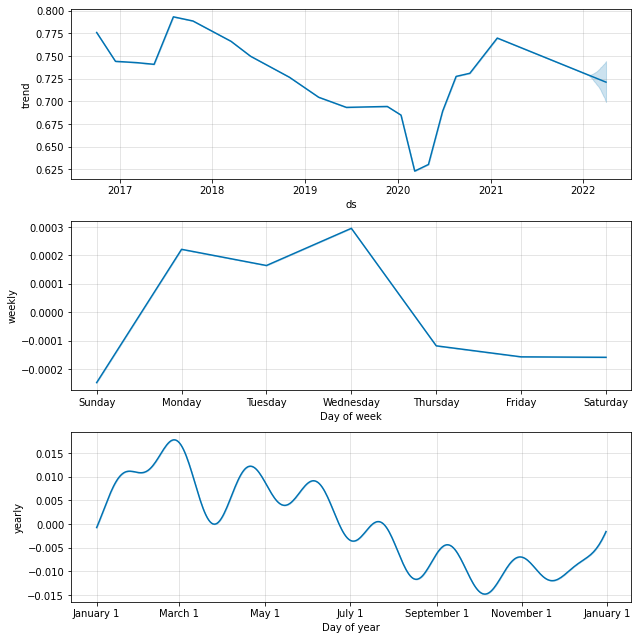

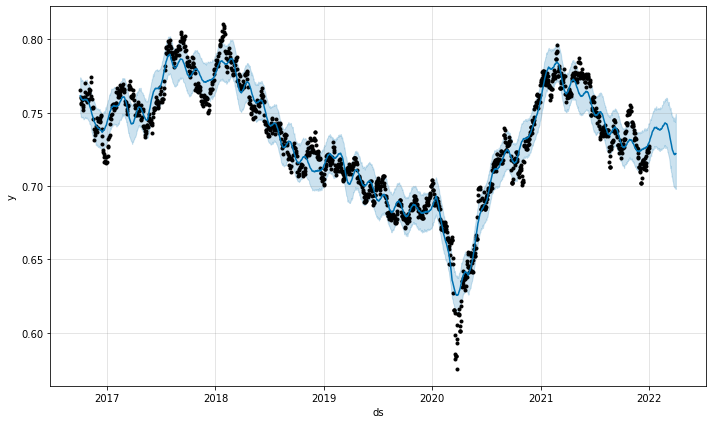

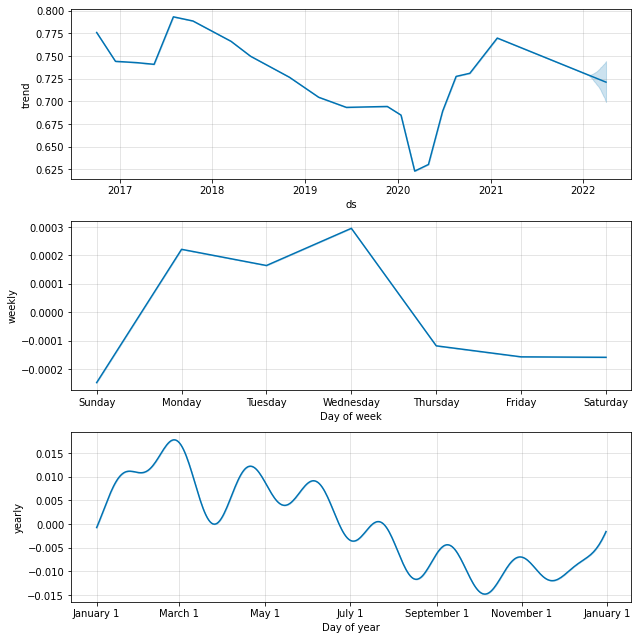

In [ ]:
# Creating future dataframe for forecasting
future = m.make_future_dataframe(periods=90) #making 3 months of forecast

# Generating forecasts
forecast = m.predict(future)

# Plotting forecasts
m.plot(forecast)
m.plot_components(forecast)

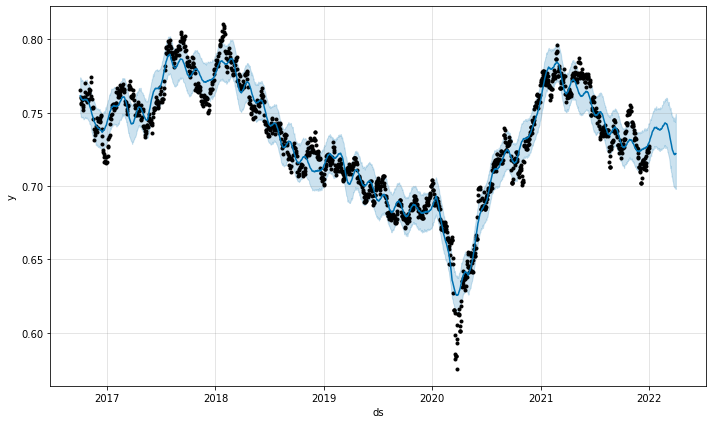

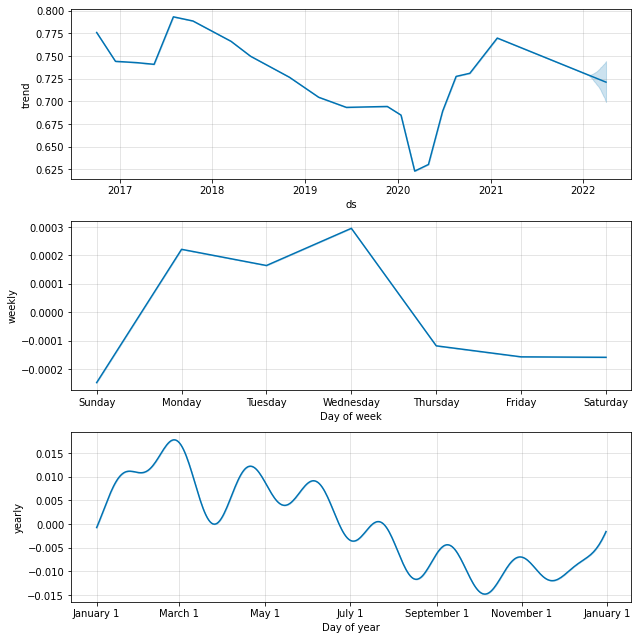

In [ ]:
# Plot forecasts
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
import os

# Create a folder to store the forecast figures
folder = "forecast_figures"
if not os.path.exists(folder):
    os.makedirs(folder)

In [ ]:
# Save forecast figures to folder
fig1.savefig(f"{folder}/forecast_{currency}.png")
fig2.savefig(f"{folder}/components_{currency}.png")

# 5. For loop to run for all the forecast and save images! WOHOO!

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/kk4lqi9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/e02eb3v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51727', 'data', 'file=/tmp/tmp4glitkd0/kk4lqi9i.json', 'init=/tmp/tmp4glitkd0/e02eb3v7.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelrfl3m3bj/prophet_model-20230218210504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


     currency rate_type  length_in_months        date      rate
0         AUD  bid_rate                 3  2016-10-03  0.765318
1         AUD  bid_rate                 3  2016-10-04  0.760240
2         AUD  bid_rate                 3  2016-10-05  0.760531
3         AUD  bid_rate                 3  2016-10-06  0.756540
4         AUD  bid_rate                 3  2016-10-07  0.755847
...       ...       ...               ...         ...       ...
1685      AUD  bid_rate                 3  2021-12-27  0.723830
1686      AUD  bid_rate                 3  2021-12-28  0.723144
1687      AUD  bid_rate                 3  2021-12-29  0.726142
1688      AUD  bid_rate                 3  2021-12-30  0.725765
1689      AUD  bid_rate                 3  2021-12-31  0.727238

[1690 rows x 5 columns]
AUD


21:05:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/szpp2z9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/dug7mta2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99999', 'data', 'file=/tmp/tmp4glitkd0/szpp2z9h.json', 'init=/tmp/tmp4glitkd0/dug7mta2.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model1oz8mxj6/prophet_model-20230218210507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


     currency rate_type  length_in_months        date      rate
1690      BGN  bid_rate                 3  2016-10-03  0.575596
1691      BGN  bid_rate                 3  2016-10-04  0.575870
1692      BGN  bid_rate                 3  2016-10-05  0.575760
1693      BGN  bid_rate                 3  2016-10-06  0.572954
1694      BGN  bid_rate                 3  2016-10-07  0.575318
...       ...       ...               ...         ...       ...
3375      BGN  bid_rate                 3  2021-12-27  0.580403
3376      BGN  bid_rate                 3  2021-12-28  0.580403
3377      BGN  bid_rate                 3  2021-12-29  0.581835
3378      BGN  bid_rate                 3  2021-12-30  0.580754
3379      BGN  bid_rate                 3  2021-12-31  0.582992

[1690 rows x 5 columns]
BGN


21:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/et5lnjcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/hgtjo_n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65410', 'data', 'file=/tmp/tmp4glitkd0/et5lnjcn.json', 'init=/tmp/tmp4glitkd0/hgtjo_n3.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modellxdb306y/prophet_model-20230218210509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


     currency rate_type  length_in_months        date      rate
3380      BHD  bid_rate                 3  2016-10-03  2.649638
3381      BHD  bid_rate                 3  2016-10-04  2.652238
3382      BHD  bid_rate                 3  2016-10-05  2.649709
3383      BHD  bid_rate                 3  2016-10-06  2.652238
3384      BHD  bid_rate                 3  2016-10-07  2.651535
...       ...       ...               ...         ...       ...
5065      BHD  bid_rate                 3  2021-12-27  2.649702
5066      BHD  bid_rate                 3  2021-12-28  2.649982
5067      BHD  bid_rate                 3  2021-12-29  2.650334
5068      BHD  bid_rate                 3  2021-12-30  2.650193
5069      BHD  bid_rate                 3  2021-12-31  2.648305

[1690 rows x 5 columns]
BHD


21:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/0v7rm5lh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/loglic0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51215', 'data', 'file=/tmp/tmp4glitkd0/0v7rm5lh.json', 'init=/tmp/tmp4glitkd0/loglic0y.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modeliwjyxokt/prophet_model-20230218210510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


     currency rate_type  length_in_months        date      rate
5070      BRL  bid_rate                 3  2016-10-03  0.303361
5071      BRL  bid_rate                 3  2016-10-04  0.298972
5072      BRL  bid_rate                 3  2016-10-05  0.302334
5073      BRL  bid_rate                 3  2016-10-06  0.301405
5074      BRL  bid_rate                 3  2016-10-07  0.302316
...       ...       ...               ...         ...       ...
6755      BRL  bid_rate                 3  2021-12-27  0.173142
6756      BRL  bid_rate                 3  2021-12-28  0.173545
6757      BRL  bid_rate                 3  2021-12-29  0.172256
6758      BRL  bid_rate                 3  2021-12-30  0.175389
6759      BRL  bid_rate                 3  2021-12-31  0.175454

[1690 rows x 5 columns]
BRL


21:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/pplfdixu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/k_tjm6p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47636', 'data', 'file=/tmp/tmp4glitkd0/pplfdixu.json', 'init=/tmp/tmp4glitkd0/k_tjm6p8.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model4mvxkyes/prophet_model-20230218210512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


     currency rate_type  length_in_months        date      rate
6760      BWP  bid_rate                 3  2016-10-03  0.094474
6761      BWP  bid_rate                 3  2016-10-04  0.094475
6762      BWP  bid_rate                 3  2016-10-05  0.094276
6763      BWP  bid_rate                 3  2016-10-06  0.093282
6764      BWP  bid_rate                 3  2016-10-07  0.093181
...       ...       ...               ...         ...       ...
8445      BWP  bid_rate                 3  2021-12-27  0.084696
8446      BWP  bid_rate                 3  2021-12-28  0.084596
8447      BWP  bid_rate                 3  2021-12-29  0.083403
8448      BWP  bid_rate                 3  2021-12-30  0.083406
8449      BWP  bid_rate                 3  2021-12-31  0.083403

[1690 rows x 5 columns]
BWP


21:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/jr17oj1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/do2tpqrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57094', 'data', 'file=/tmp/tmp4glitkd0/jr17oj1n.json', 'init=/tmp/tmp4glitkd0/do2tpqrw.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelqgwedtc1/prophet_model-20230218210514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
8450       CAD  bid_rate                 3  2016-10-03  0.762873
8451       CAD  bid_rate                 3  2016-10-04  0.758574
8452       CAD  bid_rate                 3  2016-10-05  0.759472
8453       CAD  bid_rate                 3  2016-10-06  0.757120
8454       CAD  bid_rate                 3  2016-10-07  0.752559
...        ...       ...               ...         ...       ...
10135      CAD  bid_rate                 3  2021-12-27  0.782201
10136      CAD  bid_rate                 3  2021-12-28  0.780566
10137      CAD  bid_rate                 3  2021-12-29  0.781138
10138      CAD  bid_rate                 3  2021-12-30  0.781940
10139      CAD  bid_rate                 3  2021-12-31  0.791763

[1690 rows x 5 columns]
CAD


21:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/tttej182.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/cc_lenni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17279', 'data', 'file=/tmp/tmp4glitkd0/tttej182.json', 'init=/tmp/tmp4glitkd0/cc_lenni.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelcheqa9t3/prophet_model-20230218210515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
10140      CHF  bid_rate                 3  2016-10-03  1.033442
10141      CHF  bid_rate                 3  2016-10-04  1.028034
10142      CHF  bid_rate                 3  2016-10-05  1.032375
10143      CHF  bid_rate                 3  2016-10-06  1.025805
10144      CHF  bid_rate                 3  2016-10-07  1.029133
...        ...       ...               ...         ...       ...
11825      CHF  bid_rate                 3  2021-12-27  1.092442
11826      CHF  bid_rate                 3  2021-12-28  1.091863
11827      CHF  bid_rate                 3  2021-12-29  1.097835
11828      CHF  bid_rate                 3  2021-12-30  1.097288
11829      CHF  bid_rate                 3  2021-12-31  1.100783

[1690 rows x 5 columns]
CHF


21:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/7tlz4gya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/7ly9puwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10149', 'data', 'file=/tmp/tmp4glitkd0/7tlz4gya.json', 'init=/tmp/tmp4glitkd0/7ly9puwt.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelh7n6z28v/prophet_model-20230218210518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
11830      CLP  bid_rate                 3  2016-10-03  0.001505
11831      CLP  bid_rate                 3  2016-10-04  0.001496
11832      CLP  bid_rate                 3  2016-10-05  0.001497
11833      CLP  bid_rate                 3  2016-10-06  0.001489
11834      CLP  bid_rate                 3  2016-10-07  0.001484
...        ...       ...               ...         ...       ...
13515      CLP  bid_rate                 3  2021-12-27  0.001150
13516      CLP  bid_rate                 3  2021-12-28  0.001155
13517      CLP  bid_rate                 3  2021-12-29  0.001166
13518      CLP  bid_rate                 3  2021-12-30  0.001165
13519      CLP  bid_rate                 3  2021-12-31  0.001159

[1690 rows x 5 columns]
CLP


21:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/4sz9bzhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/1au5j38_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74735', 'data', 'file=/tmp/tmp4glitkd0/4sz9bzhl.json', 'init=/tmp/tmp4glitkd0/1au5j38_.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelws4hynvs/prophet_model-20230218210520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
13520      CNH  bid_rate                 3  2016-10-03  0.148986
13521      CNH  bid_rate                 3  2016-10-04  0.148491
13522      CNH  bid_rate                 3  2016-10-05  0.148361
13523      CNH  bid_rate                 3  2016-10-06  0.148071
13524      CNH  bid_rate                 3  2016-10-07  0.148218
...        ...       ...               ...         ...       ...
15205      CNH  bid_rate                 3  2021-12-27  0.155984
15206      CNH  bid_rate                 3  2021-12-28  0.155999
15207      CNH  bid_rate                 3  2021-12-29  0.156075
15208      CNH  bid_rate                 3  2021-12-30  0.155931
15209      CNH  bid_rate                 3  2021-12-31  0.156365

[1690 rows x 5 columns]
CNH


21:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/pgzzi5xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/ew14tdtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21643', 'data', 'file=/tmp/tmp4glitkd0/pgzzi5xm.json', 'init=/tmp/tmp4glitkd0/ew14tdtx.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modelba89fyzq/prophet_model-20230218210522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
15210      CNY  bid_rate                 3  2016-10-03  0.148987
15211      CNY  bid_rate                 3  2016-10-04  0.148831
15212      CNY  bid_rate                 3  2016-10-05  0.148794
15213      CNY  bid_rate                 3  2016-10-06  0.148810
15214      CNY  bid_rate                 3  2016-10-07  0.148570
...        ...       ...               ...         ...       ...
16895      CNY  bid_rate                 3  2021-12-27  0.155872
16896      CNY  bid_rate                 3  2021-12-28  0.155911
16897      CNY  bid_rate                 3  2021-12-29  0.155982
16898      CNY  bid_rate                 3  2021-12-30  0.155902
16899      CNY  bid_rate                 3  2021-12-31  0.156272

[1690 rows x 5 columns]
CNY


21:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/2j1a_8vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/gs3_awpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76284', 'data', 'file=/tmp/tmp4glitkd0/2j1a_8vk.json', 'init=/tmp/tmp4glitkd0/gs3_awpa.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model8dxfdpz8/prophet_model-20230218210524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


      currency rate_type  length_in_months        date      rate
16900      COP  bid_rate                 3  2016-10-03  0.000336
16901      COP  bid_rate                 3  2016-10-04  0.000331
16902      COP  bid_rate                 3  2016-10-05  0.000336
16903      COP  bid_rate                 3  2016-10-06  0.000339
16904      COP  bid_rate                 3  2016-10-07  0.000336
...        ...       ...               ...         ...       ...
18585      COP  bid_rate                 3  2021-12-27  0.000248
18586      COP  bid_rate                 3  2021-12-28  0.000248
18587      COP  bid_rate                 3  2021-12-29  0.000246
18588      COP  bid_rate                 3  2021-12-30  0.000246
18589      COP  bid_rate                 3  2021-12-31  0.000244

[1690 rows x 5 columns]
COP


21:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
18590      CZK  bid_rate                 3  2016-10-03  0.041830
18591      CZK  bid_rate                 3  2016-10-04  0.041811
18592      CZK  bid_rate                 3  2016-10-05  0.041799
18593      CZK  bid_rate                 3  2016-10-06  0.041593
18594      CZK  bid_rate                 3  2016-10-07  0.041799
...        ...       ...               ...         ...       ...
20275      CZK  bid_rate                 3  2021-12-27  0.044857
20276      CZK  bid_rate                 3  2021-12-28  0.045034
20277      CZK  bid_rate                 3  2021-12-29  0.045199
20278      CZK  bid_rate                 3  2021-12-30  0.045130
20279      CZK  bid_rate                 3  2021-12-31  0.045392

[1690 rows x 5 columns]
CZK


21:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
20280      DKK  bid_rate                 3  2016-10-03  0.151336
20281      DKK  bid_rate                 3  2016-10-04  0.151232
20282      DKK  bid_rate                 3  2016-10-05  0.151283
20283      DKK  bid_rate                 3  2016-10-06  0.150507
20284      DKK  bid_rate                 3  2016-10-07  0.151188
...        ...       ...               ...         ...       ...
21965      DKK  bid_rate                 3  2021-12-27  0.152557
21966      DKK  bid_rate                 3  2021-12-28  0.152215
21967      DKK  bid_rate                 3  2021-12-29  0.152955
21968      DKK  bid_rate                 3  2021-12-30  0.152762
21969      DKK  bid_rate                 3  2021-12-31  0.153290

[1690 rows x 5 columns]
DKK


21:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
21970      EUR  bid_rate                 3  2016-10-03  1.125905
21971      EUR  bid_rate                 3  2016-10-04  1.124917
21972      EUR  bid_rate                 3  2016-10-05  1.124903
21973      EUR  bid_rate                 3  2016-10-06  1.119459
21974      EUR  bid_rate                 3  2016-10-07  1.124394
...        ...       ...               ...         ...       ...
23655      EUR  bid_rate                 3  2021-12-27  1.134120
23656      EUR  bid_rate                 3  2021-12-28  1.131518
23657      EUR  bid_rate                 3  2021-12-29  1.137047
23658      EUR  bid_rate                 3  2021-12-30  1.135195
23659      EUR  bid_rate                 3  2021-12-31  1.139224

[1690 rows x 5 columns]
EUR


21:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
23660      GBP  bid_rate                 3  2016-10-03  1.286728
23661      GBP  bid_rate                 3  2016-10-04  1.275050
23662      GBP  bid_rate                 3  2016-10-05  1.277098
23663      GBP  bid_rate                 3  2016-10-06  1.263653
23664      GBP  bid_rate                 3  2016-10-07  1.245397
...        ...       ...               ...         ...       ...
25345      GBP  bid_rate                 3  2021-12-27  1.341256
25346      GBP  bid_rate                 3  2021-12-28  1.341977
25347      GBP  bid_rate                 3  2021-12-29  1.347924
25348      GBP  bid_rate                 3  2021-12-30  1.349099
25349      GBP  bid_rate                 3  2021-12-31  1.353493

[1690 rows x 5 columns]
GBP


21:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
25350      GHS  bid_rate                 3  2016-10-03  0.238910
25351      GHS  bid_rate                 3  2016-10-04  0.239913
25352      GHS  bid_rate                 3  2016-10-05  0.242344
25353      GHS  bid_rate                 3  2016-10-06  0.242650
25354      GHS  bid_rate                 3  2016-10-07  0.242196
...        ...       ...               ...         ...       ...
27035      GHS  bid_rate                 3  2021-12-27  0.160454
27036      GHS  bid_rate                 3  2021-12-28  0.159529
27037      GHS  bid_rate                 3  2021-12-29  0.159882
27038      GHS  bid_rate                 3  2021-12-30  0.159464
27039      GHS  bid_rate                 3  2021-12-31  0.159949

[1690 rows x 5 columns]
GHS


21:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
27040      HKD  bid_rate                 3  2016-10-03  0.129074
27041      HKD  bid_rate                 3  2016-10-04  0.129074
27042      HKD  bid_rate                 3  2016-10-05  0.129056
27043      HKD  bid_rate                 3  2016-10-06  0.129060
27044      HKD  bid_rate                 3  2016-10-07  0.129036
...        ...       ...               ...         ...       ...
28725      HKD  bid_rate                 3  2021-12-27  0.128233
28726      HKD  bid_rate                 3  2021-12-28  0.128237
28727      HKD  bid_rate                 3  2021-12-29  0.128286
28728      HKD  bid_rate                 3  2021-12-30  0.128222
28729      HKD  bid_rate                 3  2021-12-31  0.128302

[1690 rows x 5 columns]
HKD


21:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
28730      HUF  bid_rate                 3  2016-10-03  0.003651
28731      HUF  bid_rate                 3  2016-10-04  0.003652
28732      HUF  bid_rate                 3  2016-10-05  0.003683
28733      HUF  bid_rate                 3  2016-10-06  0.003674
28734      HUF  bid_rate                 3  2016-10-07  0.003686
...        ...       ...               ...         ...       ...
30415      HUF  bid_rate                 3  2021-12-27  0.003034
30416      HUF  bid_rate                 3  2021-12-28  0.003029
30417      HUF  bid_rate                 3  2021-12-29  0.003037
30418      HUF  bid_rate                 3  2021-12-30  0.003037
30419      HUF  bid_rate                 3  2021-12-31  0.003058

[1690 rows x 5 columns]
HUF


21:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
30420      IDR  bid_rate                 3  2016-10-03  0.000076
30421      IDR  bid_rate                 3  2016-10-04  0.000076
30422      IDR  bid_rate                 3  2016-10-05  0.000076
30423      IDR  bid_rate                 3  2016-10-06  0.000076
30424      IDR  bid_rate                 3  2016-10-07  0.000076
...        ...       ...               ...         ...       ...
32105      IDR  bid_rate                 3  2021-12-27  0.000070
32106      IDR  bid_rate                 3  2021-12-28  0.000070
32107      IDR  bid_rate                 3  2021-12-29  0.000070
32108      IDR  bid_rate                 3  2021-12-30  0.000070
32109      IDR  bid_rate                 3  2021-12-31  0.000070

[1690 rows x 5 columns]
IDR


21:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
32110      ILS  bid_rate                 3  2016-10-03  0.266737
32111      ILS  bid_rate                 3  2016-10-04  0.265563
32112      ILS  bid_rate                 3  2016-10-05  0.265959
32113      ILS  bid_rate                 3  2016-10-06  0.264979
32114      ILS  bid_rate                 3  2016-10-07  0.264444
...        ...       ...               ...         ...       ...
33795      ILS  bid_rate                 3  2021-12-27  0.321812
33796      ILS  bid_rate                 3  2021-12-28  0.323230
33797      ILS  bid_rate                 3  2021-12-29  0.321262
33798      ILS  bid_rate                 3  2021-12-30  0.322504
33799      ILS  bid_rate                 3  2021-12-31  0.322030

[1690 rows x 5 columns]
ILS


21:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
33800      INR  bid_rate                 3  2016-10-03  0.014831
33801      INR  bid_rate                 3  2016-10-04  0.014821
33802      INR  bid_rate                 3  2016-10-05  0.014830
33803      INR  bid_rate                 3  2016-10-06  0.014808
33804      INR  bid_rate                 3  2016-10-07  0.014828
...        ...       ...               ...         ...       ...
35485      INR  bid_rate                 3  2021-12-27  0.013198
35486      INR  bid_rate                 3  2021-12-28  0.013260
35487      INR  bid_rate                 3  2021-12-29  0.013278
35488      INR  bid_rate                 3  2021-12-30  0.013291
35489      INR  bid_rate                 3  2021-12-31  0.013276

[1690 rows x 5 columns]
INR


21:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
35490      ISK  bid_rate                 3  2016-10-03  0.008709
35491      ISK  bid_rate                 3  2016-10-04  0.008676
35492      ISK  bid_rate                 3  2016-10-05  0.008683
35493      ISK  bid_rate                 3  2016-10-06  0.008655
35494      ISK  bid_rate                 3  2016-10-07  0.008700
...        ...       ...               ...         ...       ...
37175      ISK  bid_rate                 3  2021-12-27  0.007644
37176      ISK  bid_rate                 3  2021-12-28  0.007627
37177      ISK  bid_rate                 3  2021-12-29  0.007661
37178      ISK  bid_rate                 3  2021-12-30  0.007641
37179      ISK  bid_rate                 3  2021-12-31  0.007687

[1690 rows x 5 columns]
ISK


21:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
37180      JOD  bid_rate                 3  2016-10-03  1.413128
37181      JOD  bid_rate                 3  2016-10-04  1.413927
37182      JOD  bid_rate                 3  2016-10-05  1.413128
37183      JOD  bid_rate                 3  2016-10-06  1.412928
37184      JOD  bid_rate                 3  2016-10-07  1.412928
...        ...       ...               ...         ...       ...
38865      JOD  bid_rate                 3  2021-12-27  1.409841
38866      JOD  bid_rate                 3  2021-12-28  1.409841
38867      JOD  bid_rate                 3  2021-12-29  1.409841
38868      JOD  bid_rate                 3  2021-12-30  1.409841
38869      JOD  bid_rate                 3  2021-12-31  1.409344

[1690 rows x 5 columns]
JOD


21:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
38870      JPY  bid_rate                 3  2016-10-03  0.009885
38871      JPY  bid_rate                 3  2016-10-04  0.009760
38872      JPY  bid_rate                 3  2016-10-05  0.009703
38873      JPY  bid_rate                 3  2016-10-06  0.009661
38874      JPY  bid_rate                 3  2016-10-07  0.009759
...        ...       ...               ...         ...       ...
40555      JPY  bid_rate                 3  2021-12-27  0.008713
40556      JPY  bid_rate                 3  2021-12-28  0.008723
40557      JPY  bid_rate                 3  2021-12-29  0.008709
40558      JPY  bid_rate                 3  2021-12-30  0.008692
40559      JPY  bid_rate                 3  2021-12-31  0.008694

[1690 rows x 5 columns]
JPY


21:05:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
40560      KES  bid_rate                 3  2016-10-03  0.009732
40561      KES  bid_rate                 3  2016-10-04  0.009714
40562      KES  bid_rate                 3  2016-10-05  0.009705
40563      KES  bid_rate                 3  2016-10-06  0.009718
40564      KES  bid_rate                 3  2016-10-07  0.009691
...        ...       ...               ...         ...       ...
42245      KES  bid_rate                 3  2021-12-27  0.008753
42246      KES  bid_rate                 3  2021-12-28  0.008753
42247      KES  bid_rate                 3  2021-12-29  0.008750
42248      KES  bid_rate                 3  2021-12-30  0.008748
42249      KES  bid_rate                 3  2021-12-31  0.008749

[1690 rows x 5 columns]
KES


21:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
42250      KRW  bid_rate                 3  2016-10-03  0.000906
42251      KRW  bid_rate                 3  2016-10-04  0.000896
42252      KRW  bid_rate                 3  2016-10-05  0.000897
42253      KRW  bid_rate                 3  2016-10-06  0.000897
42254      KRW  bid_rate                 3  2016-10-07  0.000897
...        ...       ...               ...         ...       ...
43935      KRW  bid_rate                 3  2021-12-27  0.000841
43936      KRW  bid_rate                 3  2021-12-28  0.000840
43937      KRW  bid_rate                 3  2021-12-29  0.000842
43938      KRW  bid_rate                 3  2021-12-30  0.000839
43939      KRW  bid_rate                 3  2021-12-31  0.000840

[1690 rows x 5 columns]
KRW


21:05:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
43940      KWD  bid_rate                 3  2016-10-03  3.311257
43941      KWD  bid_rate                 3  2016-10-04  3.311916
43942      KWD  bid_rate                 3  2016-10-05  3.309067
43943      KWD  bid_rate                 3  2016-10-06  3.311039
43944      KWD  bid_rate                 3  2016-10-07  3.305238
...        ...       ...               ...         ...       ...
45625      KWD  bid_rate                 3  2021-12-27  3.301633
45626      KWD  bid_rate                 3  2021-12-28  3.301964
45627      KWD  bid_rate                 3  2021-12-29  3.301530
45628      KWD  bid_rate                 3  2021-12-30  3.302291
45629      KWD  bid_rate                 3  2021-12-31  3.303557

[1690 rows x 5 columns]
KWD


21:05:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      currency rate_type  length_in_months        date      rate
45630      MAD  bid_rate                 3  2016-10-03  0.101738
45631      MAD  bid_rate                 3  2016-10-04  0.102075
45632      MAD  bid_rate                 3  2016-10-05  0.101950
45633      MAD  bid_rate                 3  2016-10-06  0.101787
45634      MAD  bid_rate                 3  2016-10-07  0.102147
...        ...       ...               ...         ...       ...
47315      MAD  bid_rate                 3  2021-12-27  0.107491
47316      MAD  bid_rate                 3  2021-12-28  0.107410
47317      MAD  bid_rate                 3  2021-12-29  0.107896
47318      MAD  bid_rate                 3  2021-12-30  0.107831
47319      MAD  bid_rate                 3  2021-12-31  0.107641

[1690 rows x 5 columns]
MAD


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/h8_cez_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/2jxolntm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8064', 'data', 'file=/tmp/tmp4glitkd0/h8_cez_1.json', 'init=/tmp/tmp4glitkd0/2jxolntm.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_modellok7c_km/prophet_model-20230218210556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too

      currency rate_type  length_in_months        date      rate
47320      MUR  bid_rate                 3  2016-10-03  0.028299
47321      MUR  bid_rate                 3  2016-10-04  0.028277
47322      MUR  bid_rate                 3  2016-10-05  0.028379
47323      MUR  bid_rate                 3  2016-10-06  0.028392
47324      MUR  bid_rate                 3  2016-10-07  0.028308
...        ...       ...               ...         ...       ...
49005      MUR  bid_rate                 3  2021-12-27  0.022744
49006      MUR  bid_rate                 3  2021-12-28  0.022953
49007      MUR  bid_rate                 3  2021-12-29  0.023006
49008      MUR  bid_rate                 3  2021-12-30  0.022848
49009      MUR  bid_rate                 3  2021-12-31  0.023006

[1690 rows x 5 columns]
MUR


21:05:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
49010      MXN  bid_rate                 3  2016-10-03  0.051349
49011      MXN  bid_rate                 3  2016-10-04  0.051258
49012      MXN  bid_rate                 3  2016-10-05  0.051586
49013      MXN  bid_rate                 3  2016-10-06  0.051489
49014      MXN  bid_rate                 3  2016-10-07  0.051341
...        ...       ...               ...         ...       ...
50695      MXN  bid_rate                 3  2021-12-27  0.047460
50696      MXN  bid_rate                 3  2021-12-28  0.047787
50697      MXN  bid_rate                 3  2021-12-29  0.047857
50698      MXN  bid_rate                 3  2021-12-30  0.048051
50699      MXN  bid_rate                 3  2021-12-31  0.048098

[1690 rows x 5 columns]
MXN


21:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling 

      currency rate_type  length_in_months        date      rate
50700      MYR  bid_rate                 3  2018-08-10  0.244153
50701      MYR  bid_rate                 3  2018-08-13  0.243694
50702      MYR  bid_rate                 3  2018-08-14  0.243398
50703      MYR  bid_rate                 3  2018-08-15  0.243114
50704      MYR  bid_rate                 3  2018-08-16  0.242978
...        ...       ...               ...         ...       ...
50820      MYR  bid_rate                 3  2019-01-09  0.241984
50821      MYR  bid_rate                 3  2019-01-10  0.243043
50822      MYR  bid_rate                 3  2019-01-11  0.243102
50823      MYR  bid_rate                 3  2019-01-12  0.243102
50824      MYR  bid_rate                 3  2019-01-13  0.243102

[125 rows x 5 columns]
MYR


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/bok2ai0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/jsrr56uf.j

      currency rate_type  length_in_months        date      rate
50825      NGN  bid_rate                 3  2016-10-03  0.003171
50826      NGN  bid_rate                 3  2016-10-04  0.003203
50827      NGN  bid_rate                 3  2016-10-05  0.003202
50828      NGN  bid_rate                 3  2016-10-06  0.003204
50829      NGN  bid_rate                 3  2016-10-07  0.003173
...        ...       ...               ...         ...       ...
52510      NGN  bid_rate                 3  2021-12-27  0.002424
52511      NGN  bid_rate                 3  2021-12-28  0.002424
52512      NGN  bid_rate                 3  2021-12-29  0.002424
52513      NGN  bid_rate                 3  2021-12-30  0.002423
52514      NGN  bid_rate                 3  2021-12-31  0.002418

[1690 rows x 5 columns]
NGN


21:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
52515      NOK  bid_rate                 3  2016-10-03  0.125345
52516      NOK  bid_rate                 3  2016-10-04  0.124933
52517      NOK  bid_rate                 3  2016-10-05  0.124785
52518      NOK  bid_rate                 3  2016-10-06  0.124383
52519      NOK  bid_rate                 3  2016-10-07  0.123662
...        ...       ...               ...         ...       ...
54200      NOK  bid_rate                 3  2021-12-27  0.112862
54201      NOK  bid_rate                 3  2021-12-28  0.113173
54202      NOK  bid_rate                 3  2021-12-29  0.113725
54203      NOK  bid_rate                 3  2021-12-30  0.113383
54204      NOK  bid_rate                 3  2021-12-31  0.113259

[1690 rows x 5 columns]
NOK


21:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
54205      NZD  bid_rate                 3  2016-10-03  0.724836
54206      NZD  bid_rate                 3  2016-10-04  0.718210
54207      NZD  bid_rate                 3  2016-10-05  0.714001
54208      NZD  bid_rate                 3  2016-10-06  0.713360
54209      NZD  bid_rate                 3  2016-10-07  0.713310
...        ...       ...               ...         ...       ...
55890      NZD  bid_rate                 3  2021-12-27  0.679916
55891      NZD  bid_rate                 3  2021-12-28  0.678481
55892      NZD  bid_rate                 3  2021-12-29  0.682646
55893      NZD  bid_rate                 3  2021-12-30  0.682838
55894      NZD  bid_rate                 3  2021-12-31  0.683941

[1690 rows x 5 columns]
NZD


21:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
55895      OMR  bid_rate                 3  2016-10-03  2.594034
55896      OMR  bid_rate                 3  2016-10-04  2.593697
55897      OMR  bid_rate                 3  2016-10-05  2.593697
55898      OMR  bid_rate                 3  2016-10-06  2.593697
55899      OMR  bid_rate                 3  2016-10-07  2.593899
...        ...       ...               ...         ...       ...
57580      OMR  bid_rate                 3  2021-12-27  2.600611
57581      OMR  bid_rate                 3  2021-12-28  2.600831
57582      OMR  bid_rate                 3  2021-12-29  2.600831
57583      OMR  bid_rate                 3  2021-12-30  2.600696
57584      OMR  bid_rate                 3  2021-12-31  2.600763

[1690 rows x 5 columns]
OMR


21:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
57585      PHP  bid_rate                 3  2016-10-03  0.020639
57586      PHP  bid_rate                 3  2016-10-04  0.020559
57587      PHP  bid_rate                 3  2016-10-05  0.020575
57588      PHP  bid_rate                 3  2016-10-06  0.020595
57589      PHP  bid_rate                 3  2016-10-07  0.020585
...        ...       ...               ...         ...       ...
59270      PHP  bid_rate                 3  2021-12-27  0.019826
59271      PHP  bid_rate                 3  2021-12-28  0.019686
59272      PHP  bid_rate                 3  2021-12-29  0.019393
59273      PHP  bid_rate                 3  2021-12-30  0.019447
59274      PHP  bid_rate                 3  2021-12-31  0.019374

[1690 rows x 5 columns]
PHP


21:06:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
59275      PLN  bid_rate                 3  2016-10-03  0.260585
59276      PLN  bid_rate                 3  2016-10-04  0.259833
59277      PLN  bid_rate                 3  2016-10-05  0.260227
59278      PLN  bid_rate                 3  2016-10-06  0.260539
59279      PLN  bid_rate                 3  2016-10-07  0.261439
...        ...       ...               ...         ...       ...
60960      PLN  bid_rate                 3  2021-12-27  0.244511
60961      PLN  bid_rate                 3  2021-12-28  0.244400
60962      PLN  bid_rate                 3  2021-12-29  0.245368
60963      PLN  bid_rate                 3  2021-12-30  0.245067
60964      PLN  bid_rate                 3  2021-12-31  0.246464

[1690 rows x 5 columns]
PLN


21:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
60965      QAR  bid_rate                 3  2016-10-03  0.274213
60966      QAR  bid_rate                 3  2016-10-04  0.274190
60967      QAR  bid_rate                 3  2016-10-05  0.274183
60968      QAR  bid_rate                 3  2016-10-06  0.274190
60969      QAR  bid_rate                 3  2016-10-07  0.274172
...        ...       ...               ...         ...       ...
62650      QAR  bid_rate                 3  2021-12-27  0.274703
62651      QAR  bid_rate                 3  2021-12-28  0.274703
62652      QAR  bid_rate                 3  2021-12-29  0.274778
62653      QAR  bid_rate                 3  2021-12-30  0.274665
62654      QAR  bid_rate                 3  2021-12-31  0.274778

[1690 rows x 5 columns]
QAR


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/fg9ih90e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4', 'data', 'file=/tmp/tmp4glitkd0/_1y8ybzp.json', 'init=/tmp/tmp4glitkd0/fg9ih90e.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model__rhjc3f/prophet_model-20230218210612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

      currency rate_type  length_in_months        date      rate
62655      RON  bid_rate                 3  2016-10-03  0.253011
62656      RON  bid_rate                 3  2016-10-04  0.252245
62657      RON  bid_rate                 3  2016-10-05  0.251959
62658      RON  bid_rate                 3  2016-10-06  0.249960
62659      RON  bid_rate                 3  2016-10-07  0.249233
...        ...       ...               ...         ...       ...
64340      RON  bid_rate                 3  2021-12-27  0.226933
64341      RON  bid_rate                 3  2021-12-28  0.226508
64342      RON  bid_rate                 3  2021-12-29  0.227597
64343      RON  bid_rate                 3  2021-12-30  0.227273
64344      RON  bid_rate                 3  2021-12-31  0.227955

[1690 rows x 5 columns]
RON


21:06:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
64345      RSD  bid_rate                 3  2016-10-03  0.009080
64346      RSD  bid_rate                 3  2016-10-04  0.009083
64347      RSD  bid_rate                 3  2016-10-05  0.009062
64348      RSD  bid_rate                 3  2016-10-06  0.009018
64349      RSD  bid_rate                 3  2016-10-07  0.009109
...        ...       ...               ...         ...       ...
66030      RSD  bid_rate                 3  2021-12-27  0.009638
66031      RSD  bid_rate                 3  2021-12-28  0.009616
66032      RSD  bid_rate                 3  2021-12-29  0.009664
66033      RSD  bid_rate                 3  2021-12-30  0.009644
66034      RSD  bid_rate                 3  2021-12-31  0.009699

[1690 rows x 5 columns]
RSD


21:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
66035      RUB  bid_rate                 3  2016-10-03  0.015692
66036      RUB  bid_rate                 3  2016-10-04  0.015585
66037      RUB  bid_rate                 3  2016-10-05  0.015704
66038      RUB  bid_rate                 3  2016-10-06  0.015766
66039      RUB  bid_rate                 3  2016-10-07  0.015737
...        ...       ...               ...         ...       ...
67720      RUB  bid_rate                 3  2021-12-27  0.013326
67721      RUB  bid_rate                 3  2021-12-28  0.013278
67722      RUB  bid_rate                 3  2021-12-29  0.013208
67723      RUB  bid_rate                 3  2021-12-30  0.013123
67724      RUB  bid_rate                 3  2021-12-31  0.013065

[1690 rows x 5 columns]
RUB


21:06:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
67725      SAR  bid_rate                 3  2016-10-03  0.266248
67726      SAR  bid_rate                 3  2016-10-04  0.266198
67727      SAR  bid_rate                 3  2016-10-05  0.266064
67728      SAR  bid_rate                 3  2016-10-06  0.266219
67729      SAR  bid_rate                 3  2016-10-07  0.266103
...        ...       ...               ...         ...       ...
69410      SAR  bid_rate                 3  2021-12-27  0.266397
69411      SAR  bid_rate                 3  2021-12-28  0.266375
69412      SAR  bid_rate                 3  2021-12-29  0.266495
69413      SAR  bid_rate                 3  2021-12-30  0.266468
69414      SAR  bid_rate                 3  2021-12-31  0.266468

[1690 rows x 5 columns]
SAR


21:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
69415      SEK  bid_rate                 3  2016-10-03  0.117326
69416      SEK  bid_rate                 3  2016-10-04  0.116854
69417      SEK  bid_rate                 3  2016-10-05  0.117000
69418      SEK  bid_rate                 3  2016-10-06  0.116402
69419      SEK  bid_rate                 3  2016-10-07  0.116498
...        ...       ...               ...         ...       ...
71100      SEK  bid_rate                 3  2021-12-27  0.109933
71101      SEK  bid_rate                 3  2021-12-28  0.110481
71102      SEK  bid_rate                 3  2021-12-29  0.110743
71103      SEK  bid_rate                 3  2021-12-30  0.110633
71104      SEK  bid_rate                 3  2021-12-31  0.110618

[1690 rows x 5 columns]
SEK


21:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
71105      SGD  bid_rate                 3  2016-10-03  0.733099
71106      SGD  bid_rate                 3  2016-10-04  0.729982
71107      SGD  bid_rate                 3  2016-10-05  0.730300
71108      SGD  bid_rate                 3  2016-10-06  0.729114
71109      SGD  bid_rate                 3  2016-10-07  0.728730
...        ...       ...               ...         ...       ...
72790      SGD  bid_rate                 3  2021-12-27  0.736722
72791      SGD  bid_rate                 3  2021-12-28  0.737603
72792      SGD  bid_rate                 3  2021-12-29  0.739545
72793      SGD  bid_rate                 3  2021-12-30  0.739388
72794      SGD  bid_rate                 3  2021-12-31  0.741584

[1690 rows x 5 columns]
SGD


21:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
72795      THB  bid_rate                 3  2016-10-03  0.028862
72796      THB  bid_rate                 3  2016-10-04  0.028748
72797      THB  bid_rate                 3  2016-10-05  0.028745
72798      THB  bid_rate                 3  2016-10-06  0.028683
72799      THB  bid_rate                 3  2016-10-07  0.028690
...        ...       ...               ...         ...       ...
74480      THB  bid_rate                 3  2021-12-27  0.029862
74481      THB  bid_rate                 3  2021-12-28  0.029886
74482      THB  bid_rate                 3  2021-12-29  0.029882
74483      THB  bid_rate                 3  2021-12-30  0.030004
74484      THB  bid_rate                 3  2021-12-31  0.030191

[1690 rows x 5 columns]
THB


21:06:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
74485      TND  bid_rate                 3  2016-10-03  0.438712
74486      TND  bid_rate                 3  2016-10-04  0.440063
74487      TND  bid_rate                 3  2016-10-05  0.438212
74488      TND  bid_rate                 3  2016-10-06  0.438001
74489      TND  bid_rate                 3  2016-10-07  0.439155
...        ...       ...               ...         ...       ...
76170      TND  bid_rate                 3  2021-12-27  0.343136
76171      TND  bid_rate                 3  2021-12-28  0.338272
76172      TND  bid_rate                 3  2021-12-29  0.342630
76173      TND  bid_rate                 3  2021-12-30  0.338811
76174      TND  bid_rate                 3  2021-12-31  0.342983

[1690 rows x 5 columns]
TND


21:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
76175      TRY  bid_rate                 3  2016-10-03  0.325538
76176      TRY  bid_rate                 3  2016-10-04  0.321442
76177      TRY  bid_rate                 3  2016-10-05  0.322003
76178      TRY  bid_rate                 3  2016-10-06  0.323204
76179      TRY  bid_rate                 3  2016-10-07  0.321920
...        ...       ...               ...         ...       ...
77860      TRY  bid_rate                 3  2021-12-27  0.081573
77861      TRY  bid_rate                 3  2021-12-28  0.079210
77862      TRY  bid_rate                 3  2021-12-29  0.074344
77863      TRY  bid_rate                 3  2021-12-30  0.071889
77864      TRY  bid_rate                 3  2021-12-31  0.069996

[1690 rows x 5 columns]
TRY


21:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
77865      UGX  bid_rate                 3  2016-10-03  0.000288
77866      UGX  bid_rate                 3  2016-10-04  0.000288
77867      UGX  bid_rate                 3  2016-10-05  0.000289
77868      UGX  bid_rate                 3  2016-10-06  0.000286
77869      UGX  bid_rate                 3  2016-10-07  0.000287
...        ...       ...               ...         ...       ...
79550      UGX  bid_rate                 3  2021-12-27  0.000278
79551      UGX  bid_rate                 3  2021-12-28  0.000277
79552      UGX  bid_rate                 3  2021-12-29  0.000277
79553      UGX  bid_rate                 3  2021-12-30  0.000278
79554      UGX  bid_rate                 3  2021-12-31  0.000277

[1690 rows x 5 columns]
UGX


21:06:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      currency rate_type  length_in_months        date  rate
79555      USD  bid_rate                 3  2016-10-03   1.0
79556      USD  bid_rate                 3  2016-10-04   1.0
79557      USD  bid_rate                 3  2016-10-05   1.0
79558      USD  bid_rate                 3  2016-10-06   1.0
79559      USD  bid_rate                 3  2016-10-07   1.0
...        ...       ...               ...         ...   ...
81240      USD  bid_rate                 3  2021-12-27   1.0
81241      USD  bid_rate                 3  2021-12-28   1.0
81242      USD  bid_rate                 3  2021-12-29   1.0
81243      USD  bid_rate                 3  2021-12-30   1.0
81244      USD  bid_rate                 3  2021-12-31   1.0

[1690 rows x 5 columns]
USD


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      currency rate_type  length_in_months        date      rate
81245      XAF  bid_rate                 3  2016-10-03  0.001704
81246      XAF  bid_rate                 3  2016-10-04  0.001703
81247      XAF  bid_rate                 3  2016-10-05  0.001703
81248      XAF  bid_rate                 3  2016-10-06  0.001695
81249      XAF  bid_rate                 3  2016-10-07  0.001702
...        ...       ...               ...         ...       ...
82930      XAF  bid_rate                 3  2021-12-27  0.001733
82931      XAF  bid_rate                 3  2021-12-28  0.001738
82932      XAF  bid_rate                 3  2021-12-29  0.001733
82933      XAF  bid_rate                 3  2021-12-30  0.001730
82934      XAF  bid_rate                 3  2021-12-31  0.001736

[1690 rows x 5 columns]
XAF


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/mh6ffgkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4glitkd0/6_bysc59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52025', 'data', 'file=/tmp/tmp4glitkd0/mh6ffgkb.json', 'init=/tmp/tmp4glitkd0/6_bysc59.json', 'output', 'file=/tmp/tmp4glitkd0/prophet_model3pca5a8a/prophet_model-20230218210634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

      currency rate_type  length_in_months        date      rate
82935      XOF  bid_rate                 3  2016-10-03  0.001703
82936      XOF  bid_rate                 3  2016-10-04  0.001702
82937      XOF  bid_rate                 3  2016-10-05  0.001698
82938      XOF  bid_rate                 3  2016-10-06  0.001691
82939      XOF  bid_rate                 3  2016-10-07  0.001701
...        ...       ...               ...         ...       ...
84620      XOF  bid_rate                 3  2021-12-27  0.001736
84621      XOF  bid_rate                 3  2021-12-28  0.001735
84622      XOF  bid_rate                 3  2021-12-29  0.001733
84623      XOF  bid_rate                 3  2021-12-30  0.001735
84624      XOF  bid_rate                 3  2021-12-31  0.001734

[1690 rows x 5 columns]
XOF


21:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
84625      ZAR  bid_rate                 3  2016-10-03  0.072327
84626      ZAR  bid_rate                 3  2016-10-04  0.071094
84627      ZAR  bid_rate                 3  2016-10-05  0.071621
84628      ZAR  bid_rate                 3  2016-10-06  0.070843
84629      ZAR  bid_rate                 3  2016-10-07  0.070915
...        ...       ...               ...         ...       ...
86310      ZAR  bid_rate                 3  2021-12-27  0.063578
86311      ZAR  bid_rate                 3  2021-12-28  0.062552
86312      ZAR  bid_rate                 3  2021-12-29  0.062030
86313      ZAR  bid_rate                 3  2021-12-30  0.061793
86314      ZAR  bid_rate                 3  2021-12-31  0.061943

[1690 rows x 5 columns]
ZAR


21:06:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tem

      currency rate_type  length_in_months        date      rate
86315      ZMW  bid_rate                 3  2016-10-03  0.096287
86316      ZMW  bid_rate                 3  2016-10-04  0.097751
86317      ZMW  bid_rate                 3  2016-10-05  0.098423
86318      ZMW  bid_rate                 3  2016-10-06  0.097504
86319      ZMW  bid_rate                 3  2016-10-07  0.096770
...        ...       ...               ...         ...       ...
88000      ZMW  bid_rate                 3  2021-12-27  0.057945
88001      ZMW  bid_rate                 3  2021-12-28  0.057873
88002      ZMW  bid_rate                 3  2021-12-29  0.057788
88003      ZMW  bid_rate                 3  2021-12-30  0.057770
88004      ZMW  bid_rate                 3  2021-12-31  0.057703

[1690 rows x 5 columns]
ZMW


21:06:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(npanel, 1, facecolor='w', figsize=figsize)


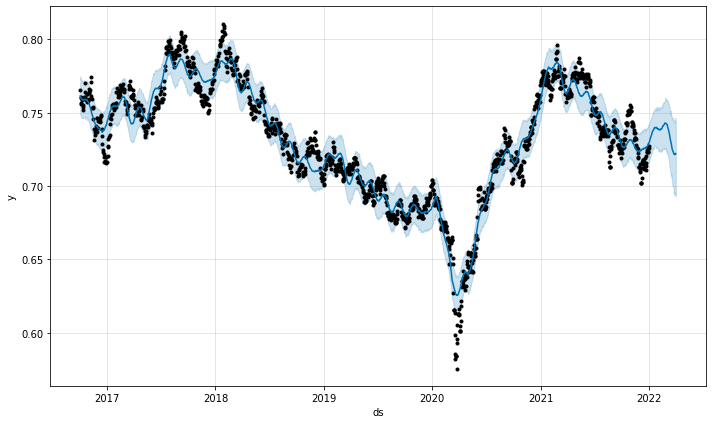

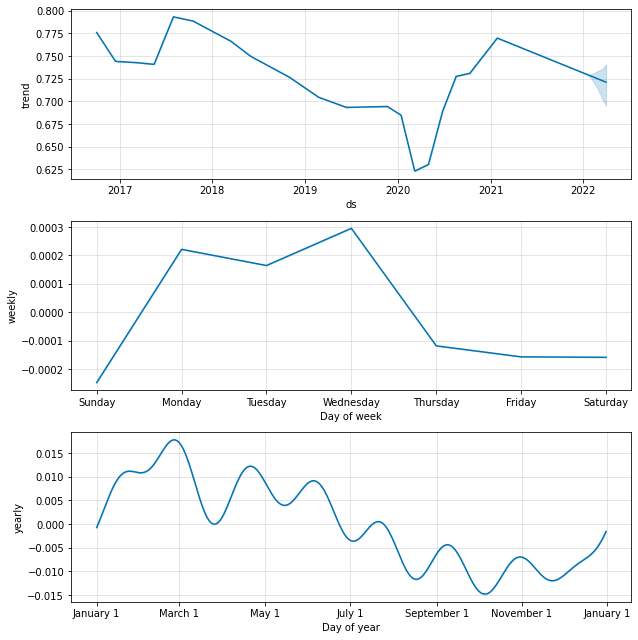

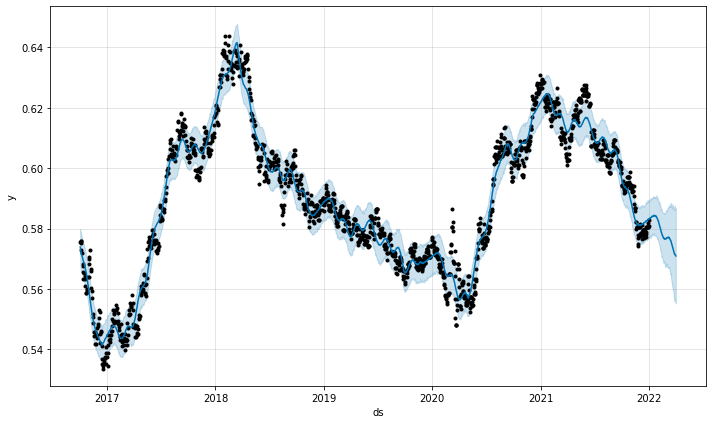

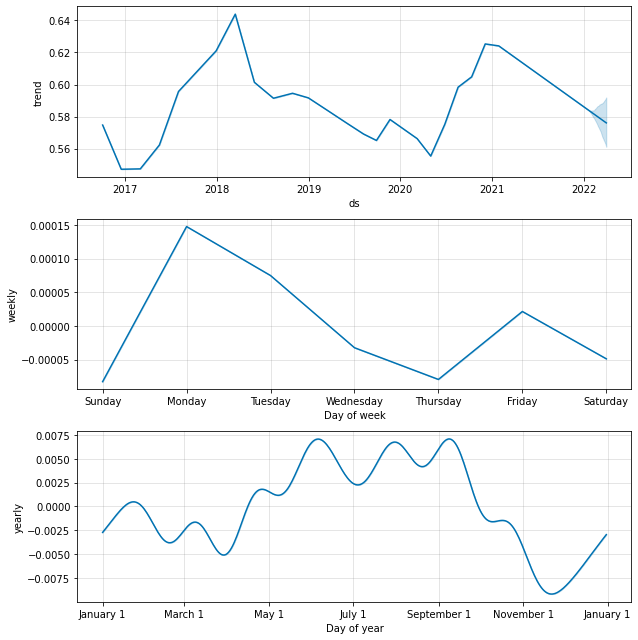

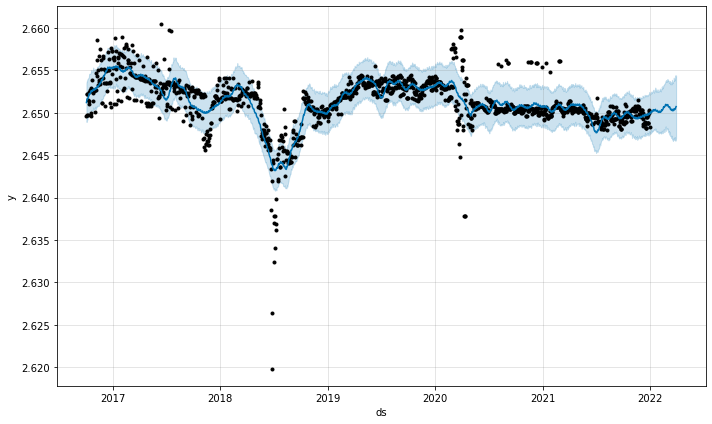

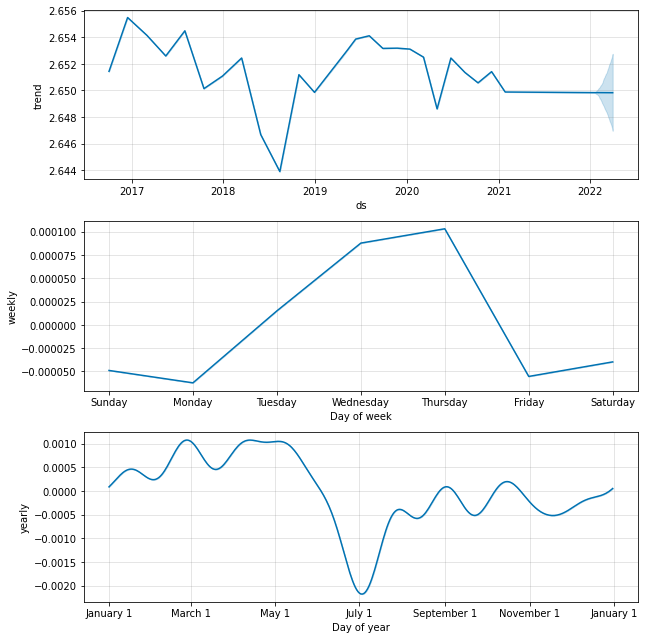

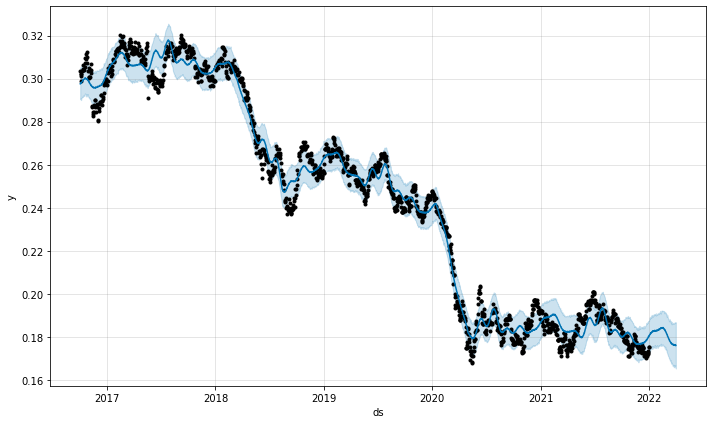

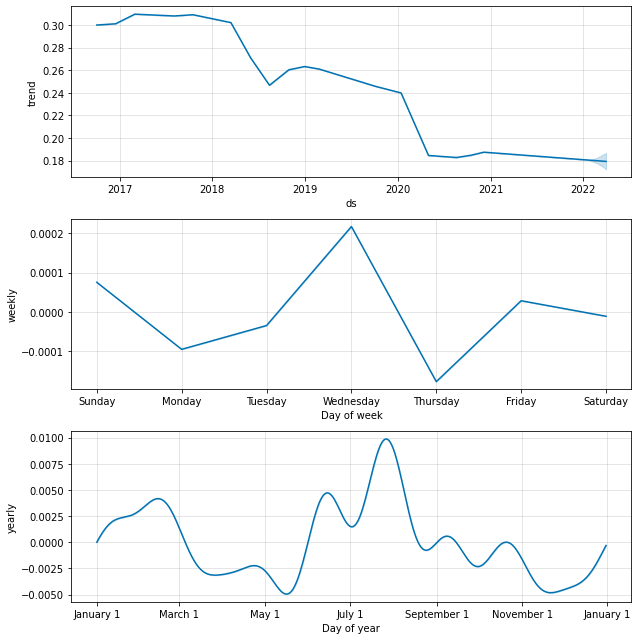

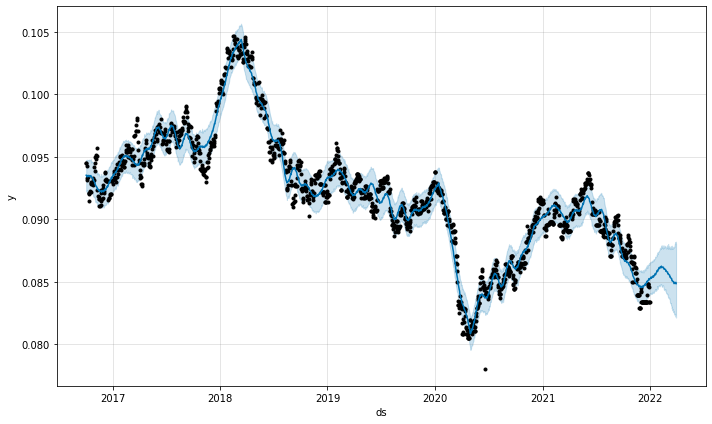

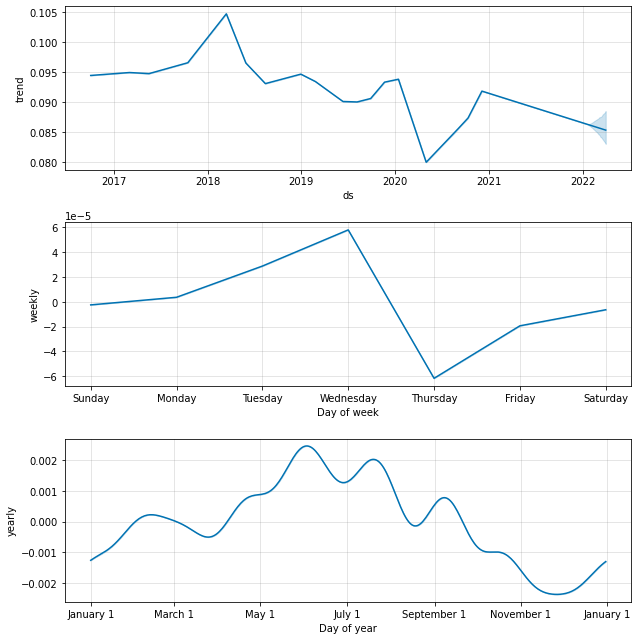

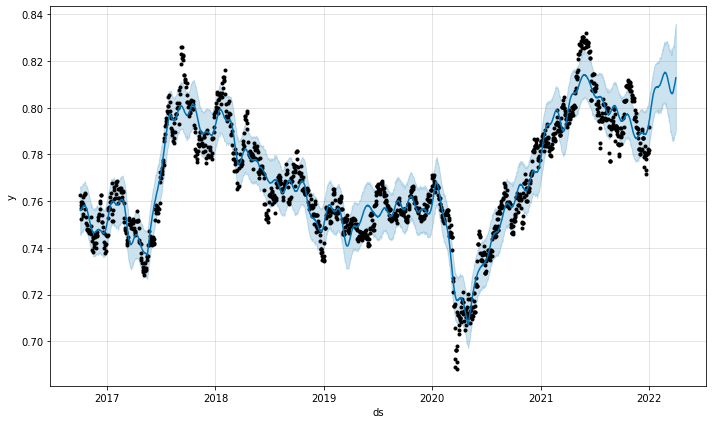

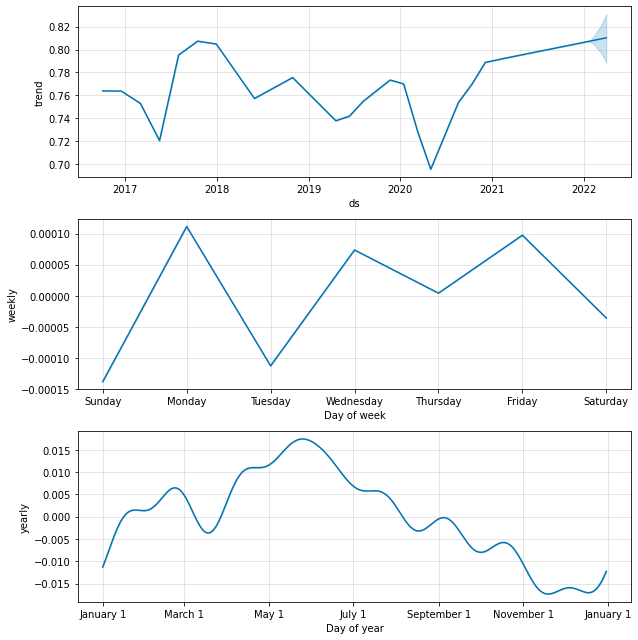

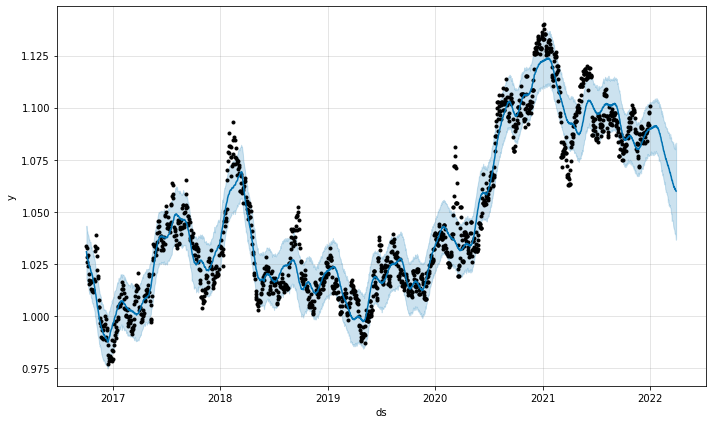

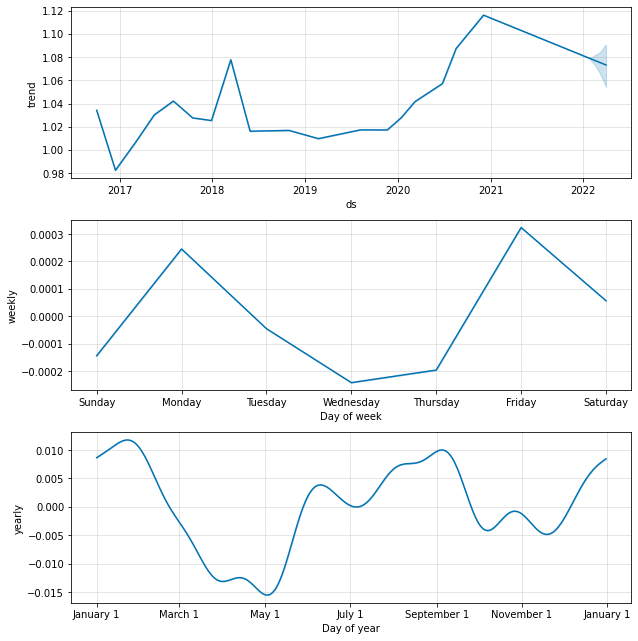

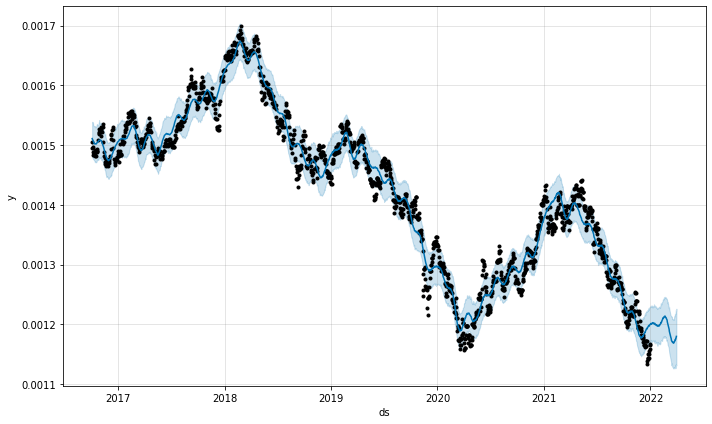

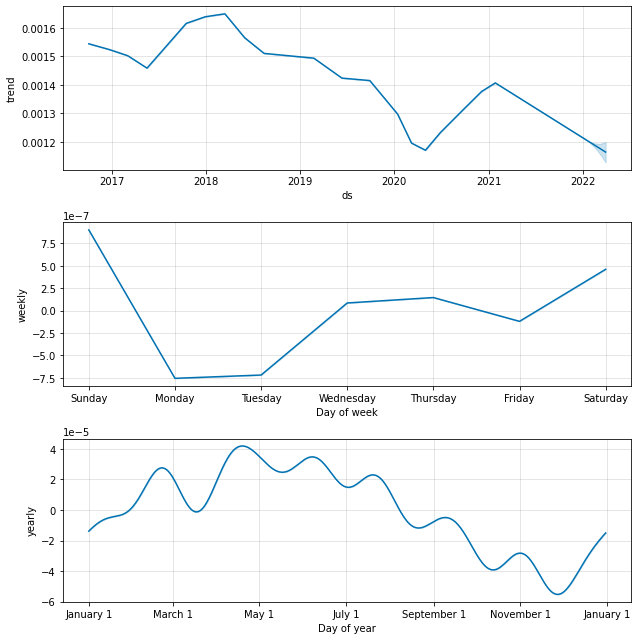

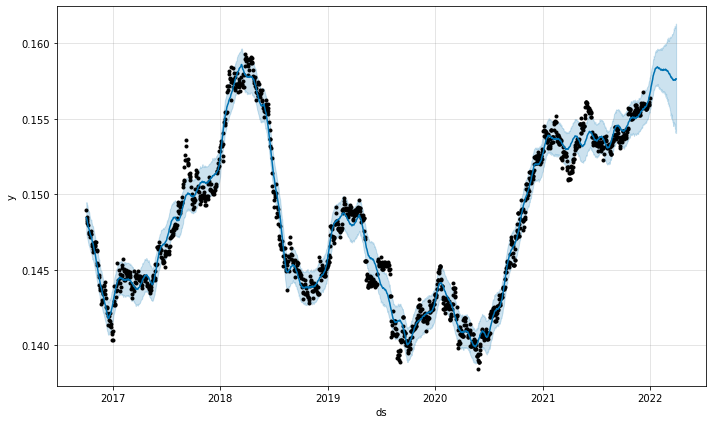

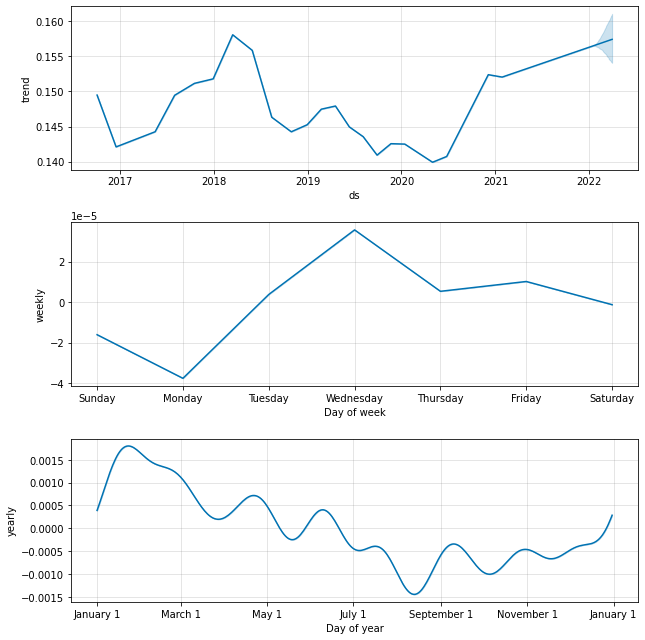

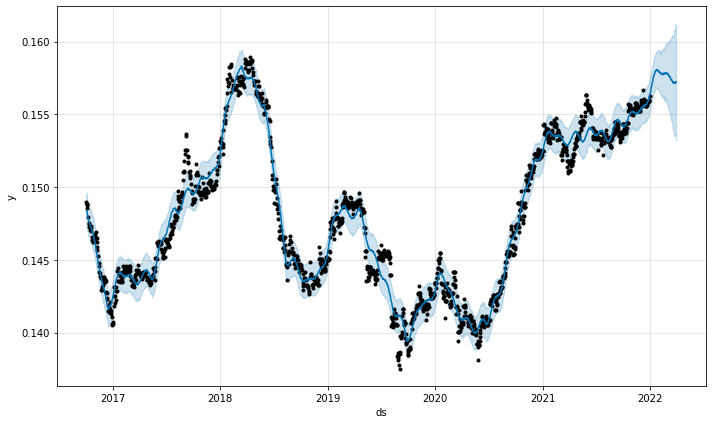

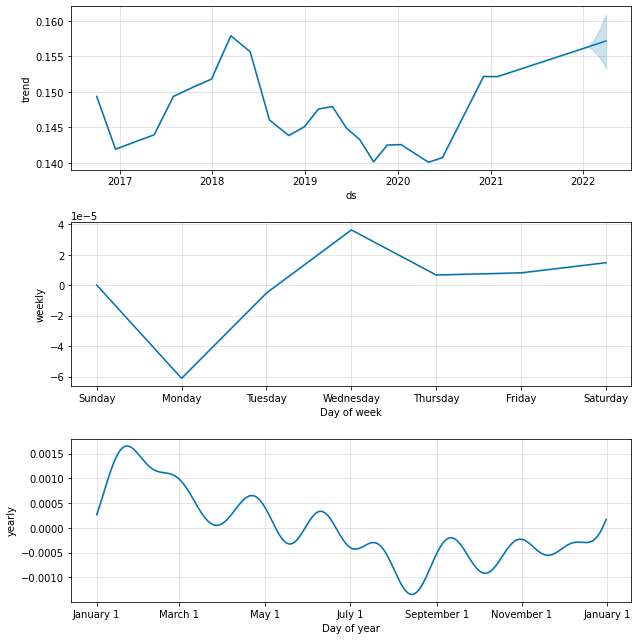

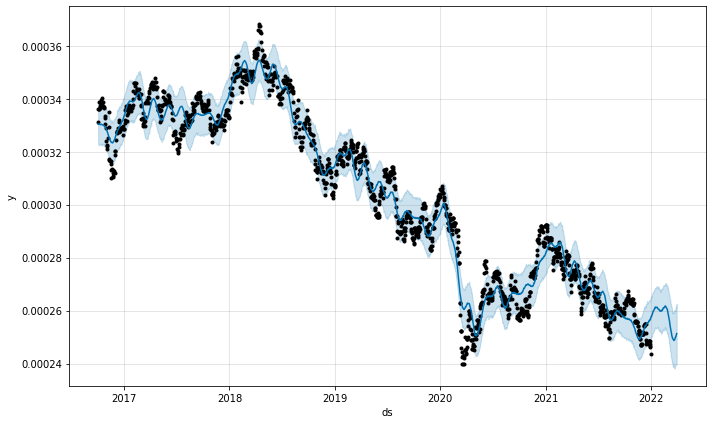

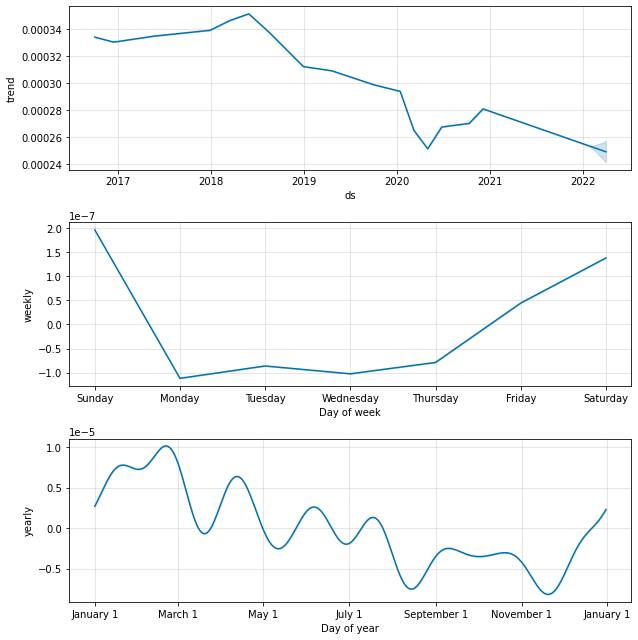

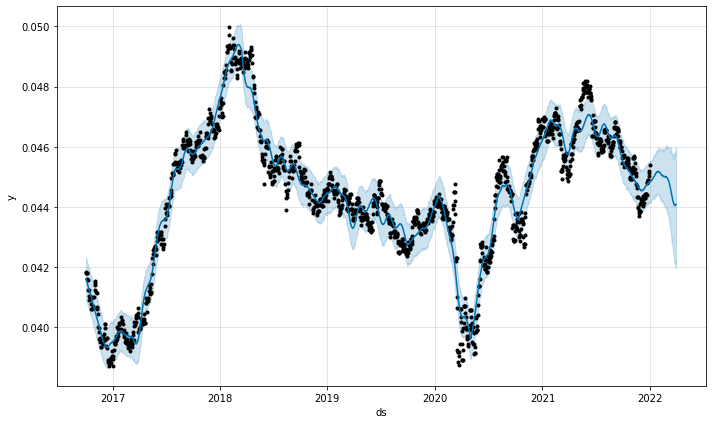

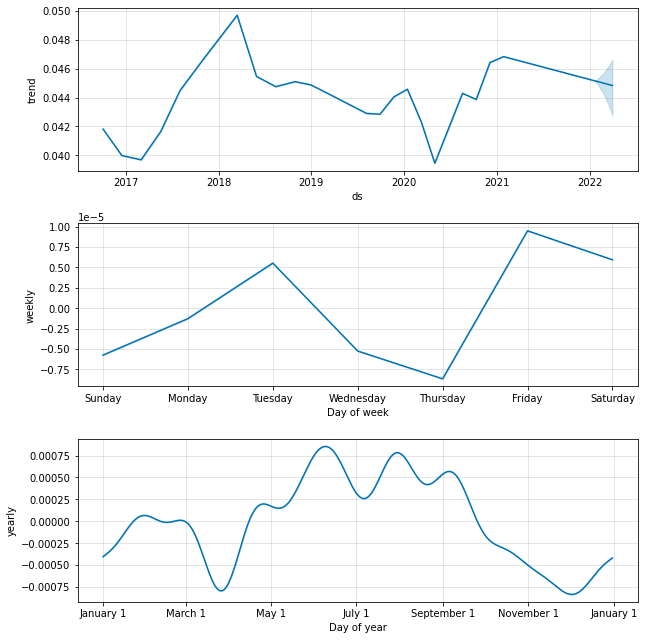

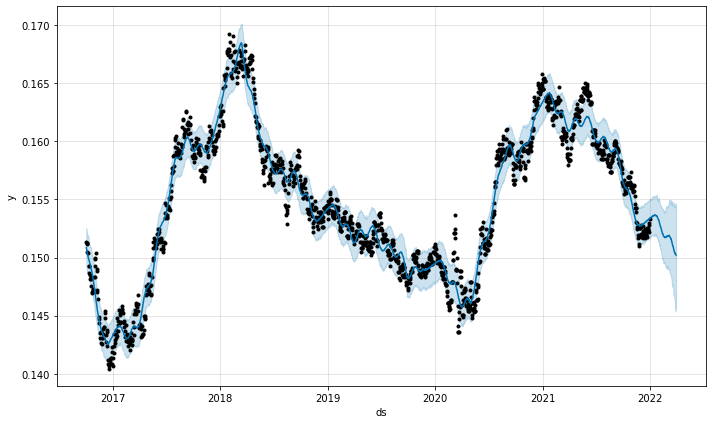

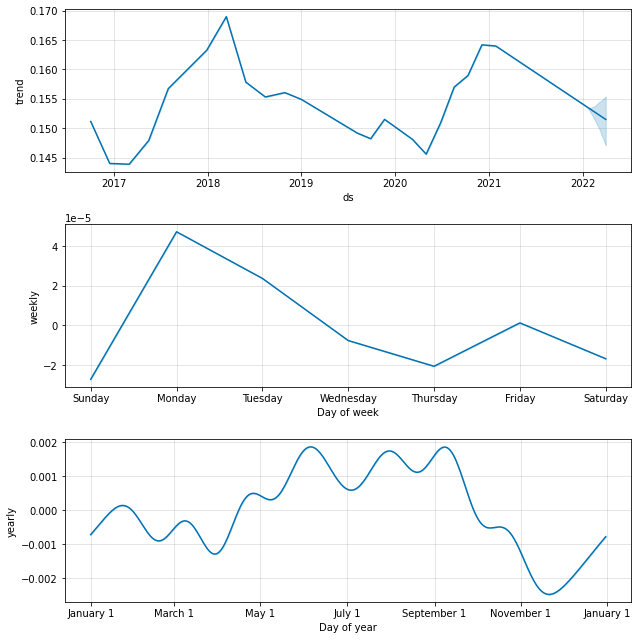

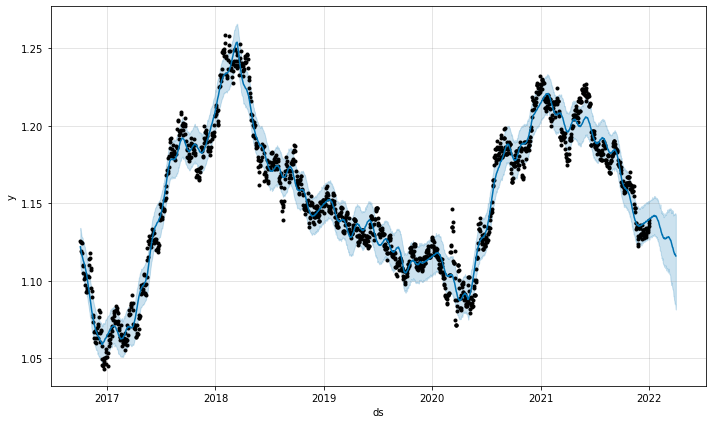

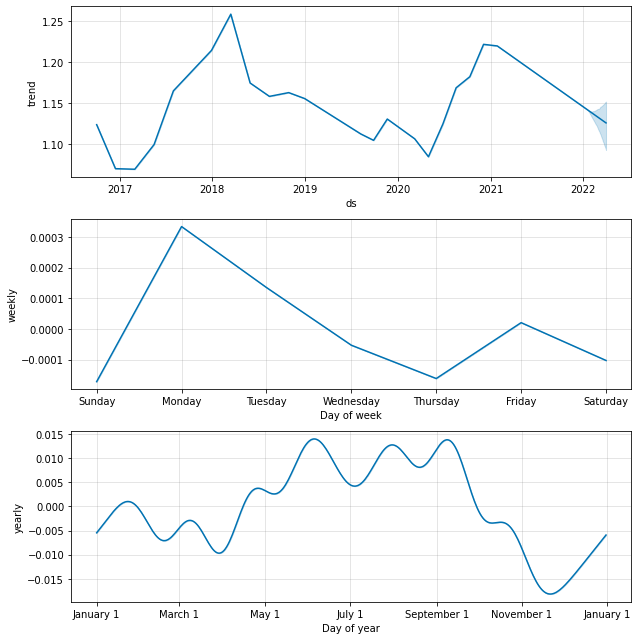

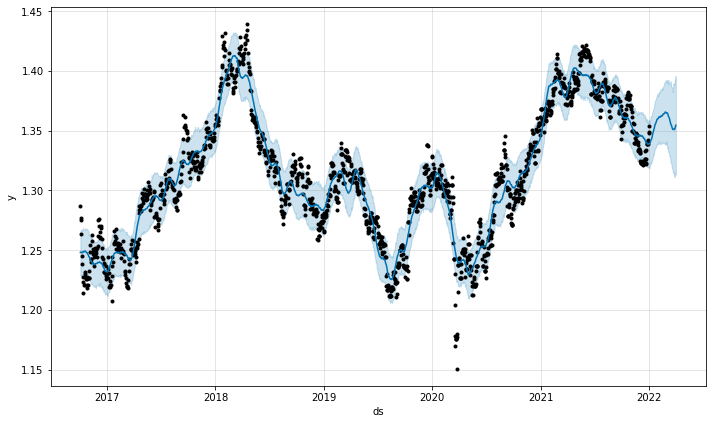

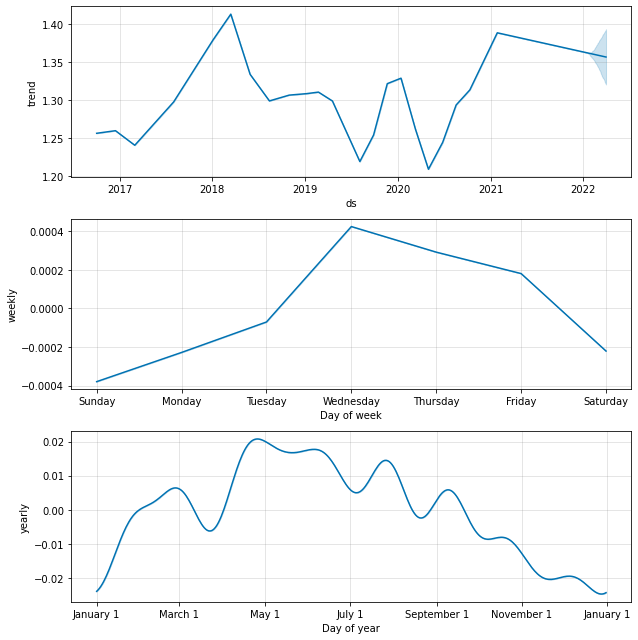

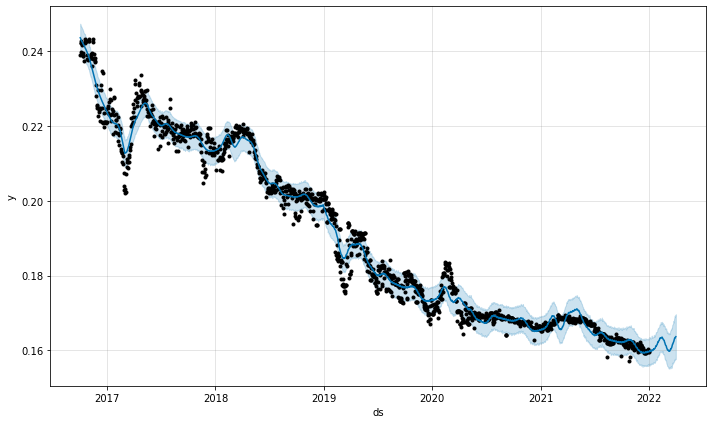

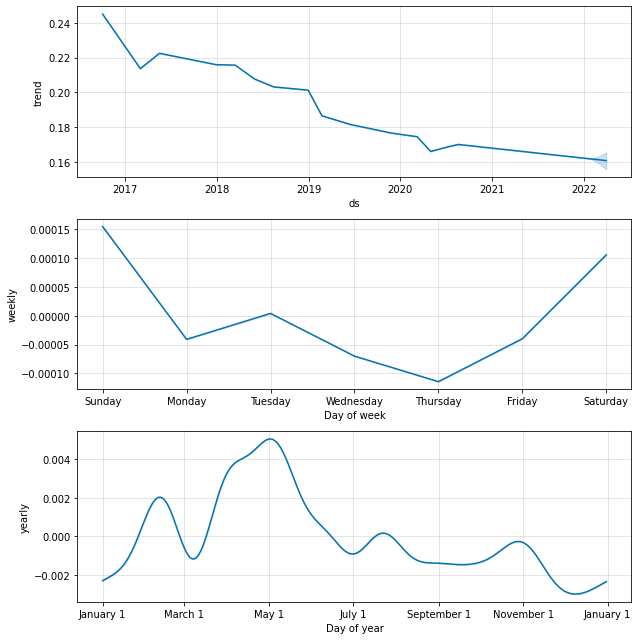

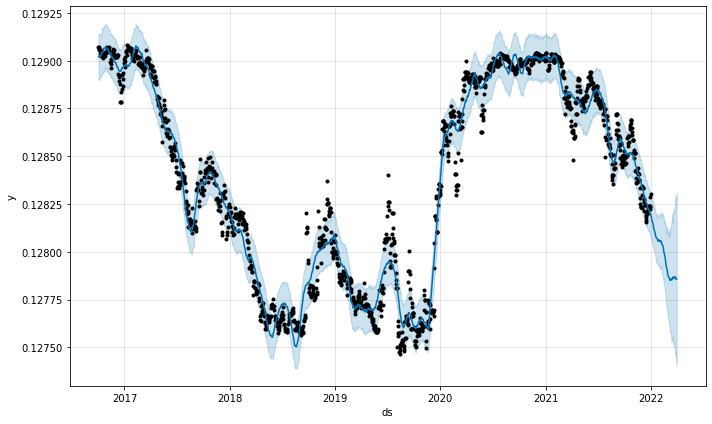

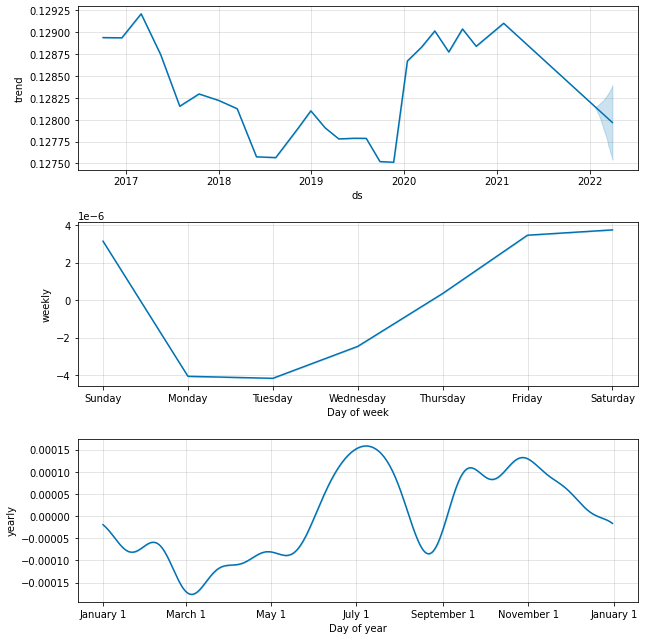

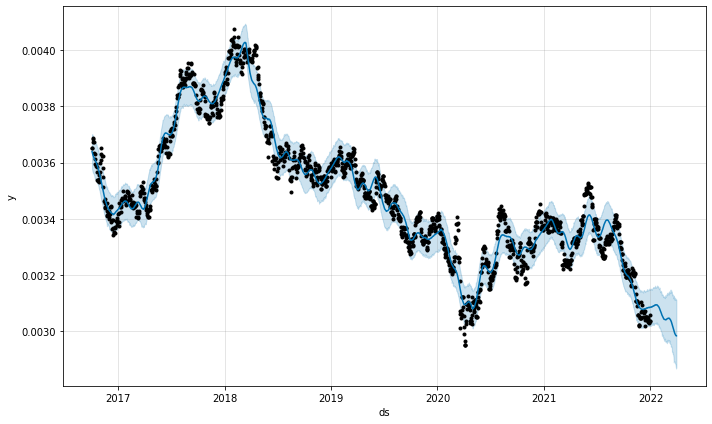

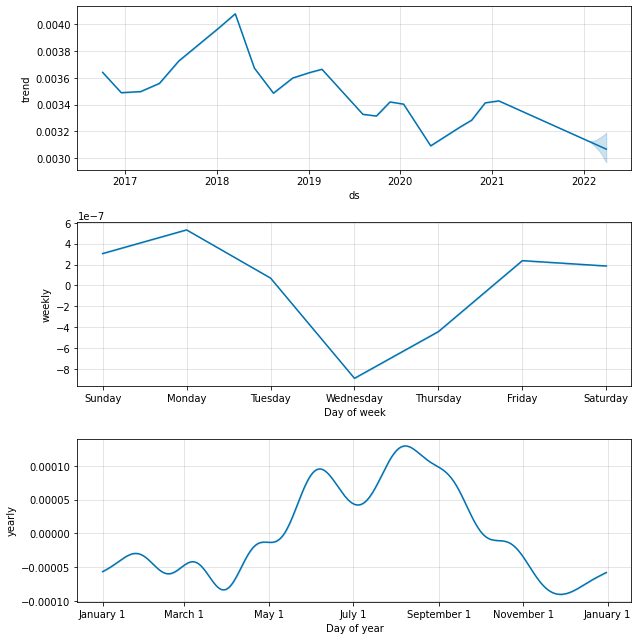

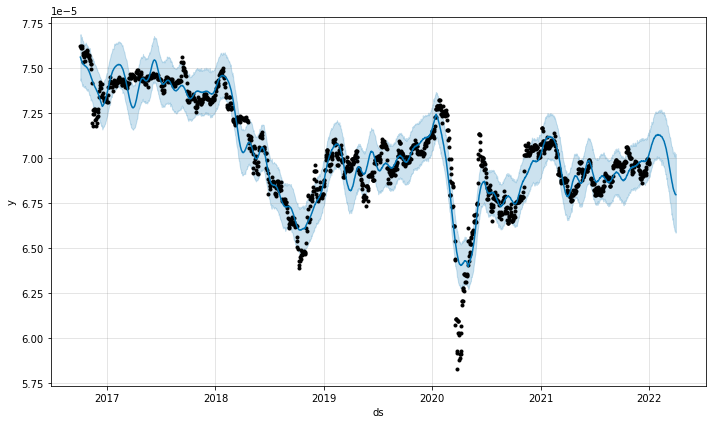

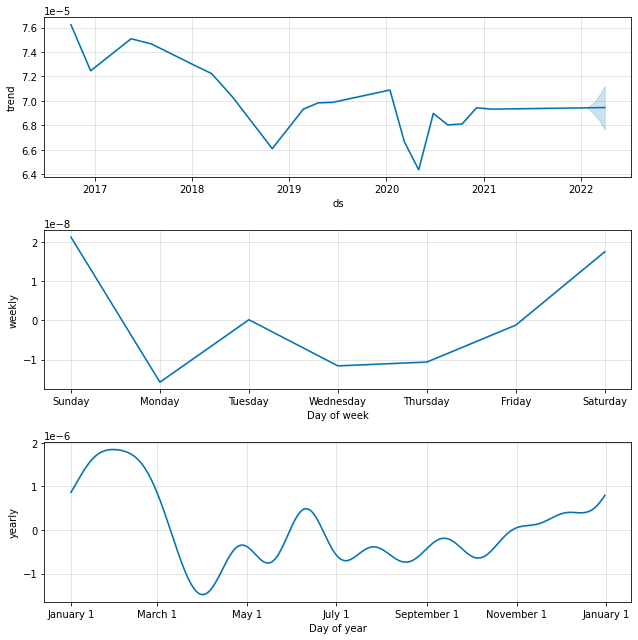

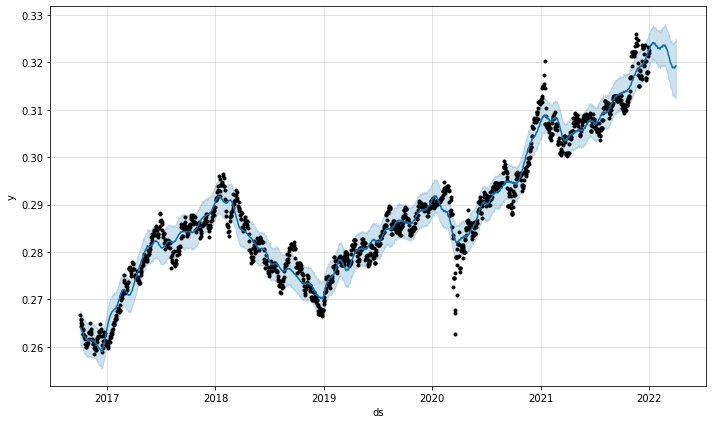

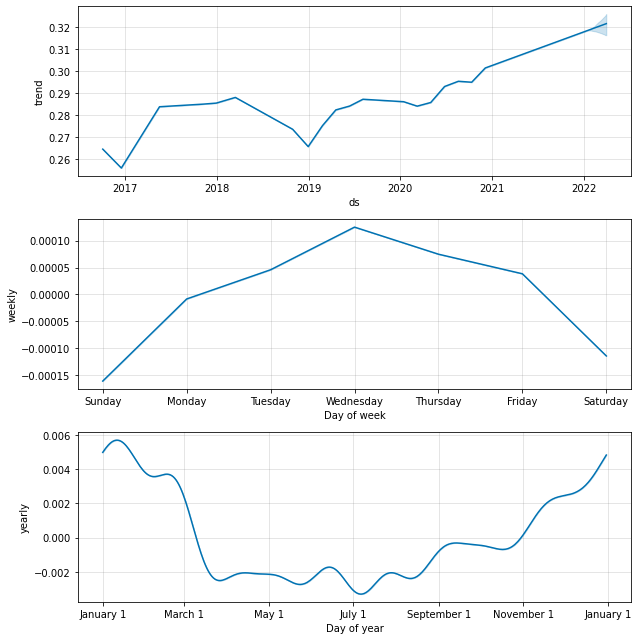

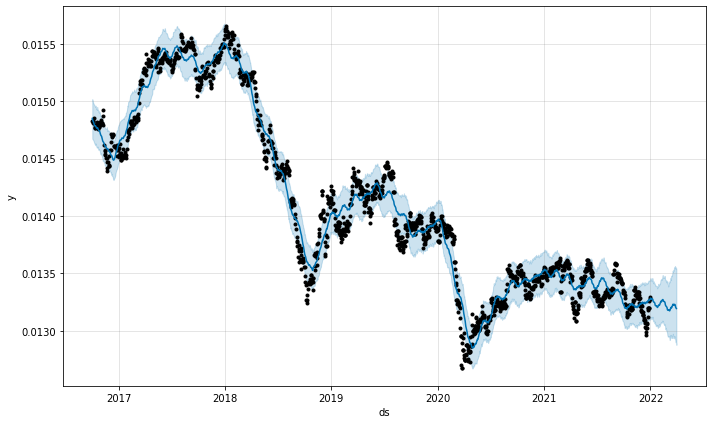

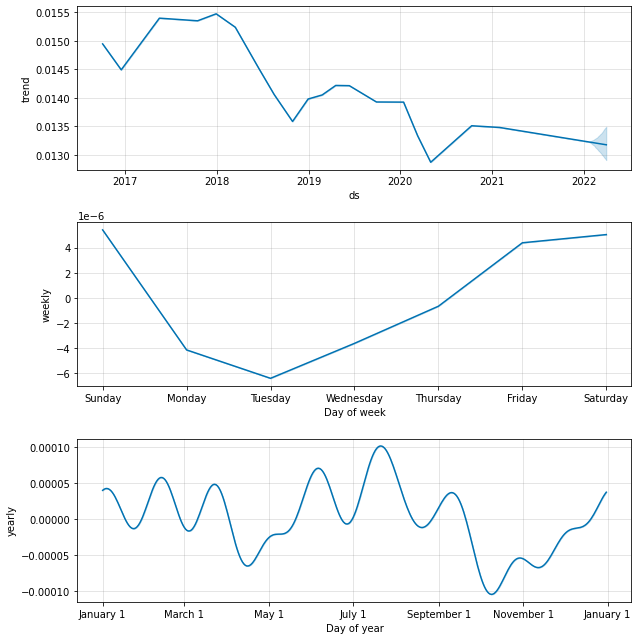

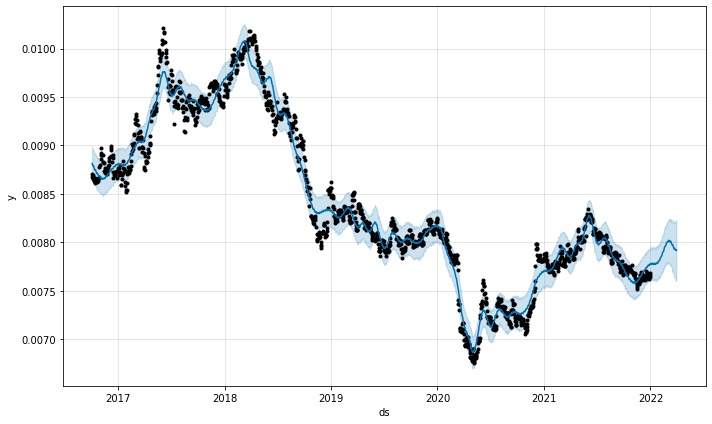

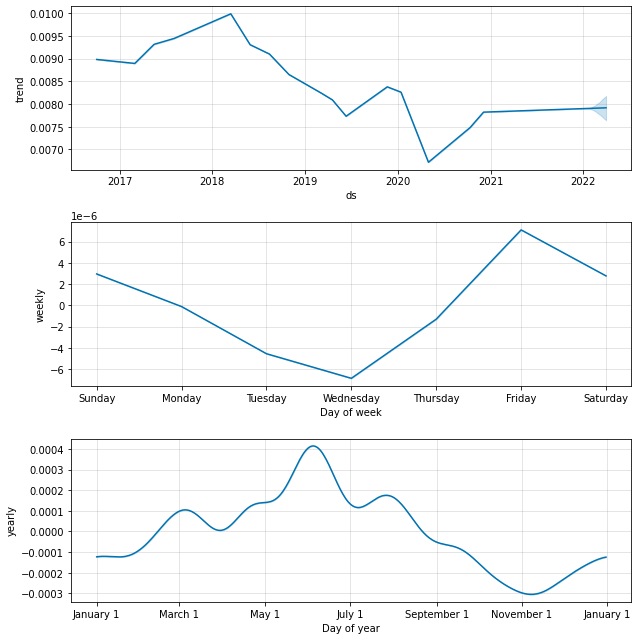

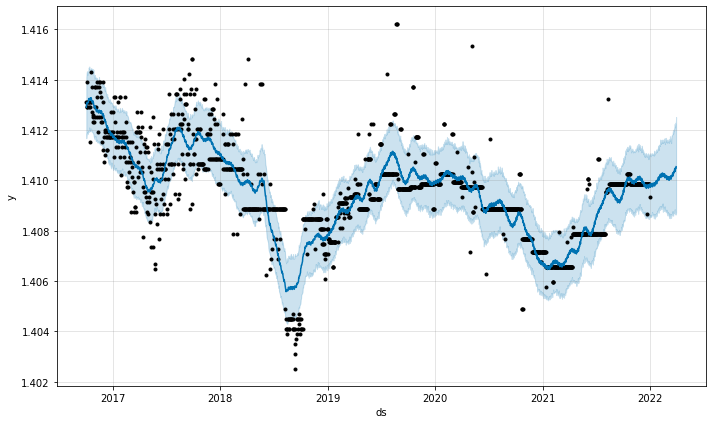

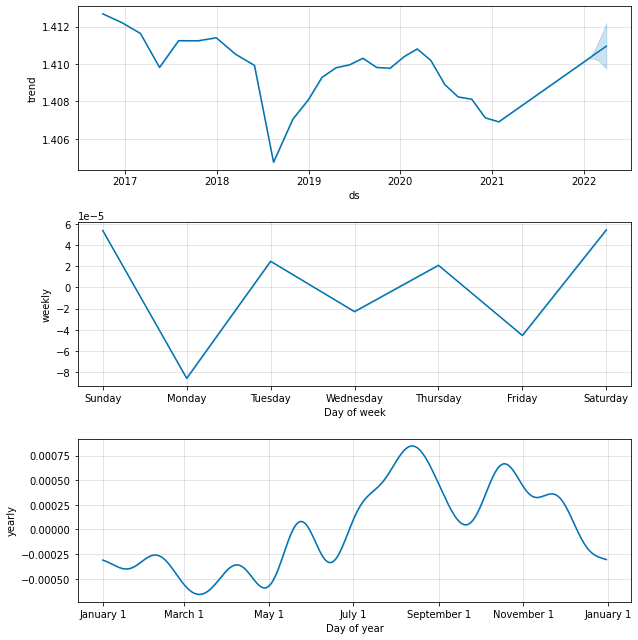

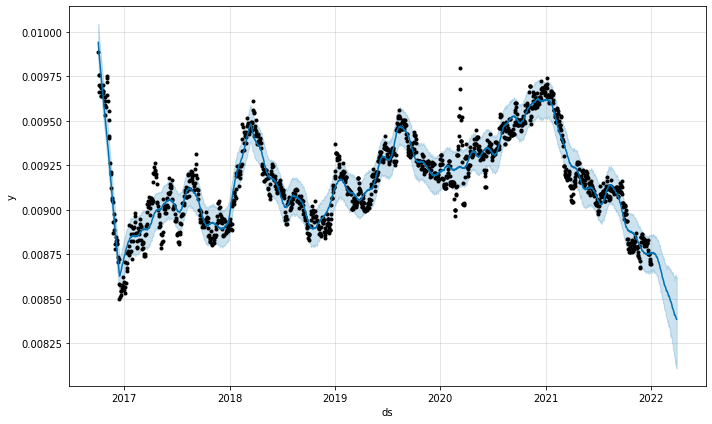

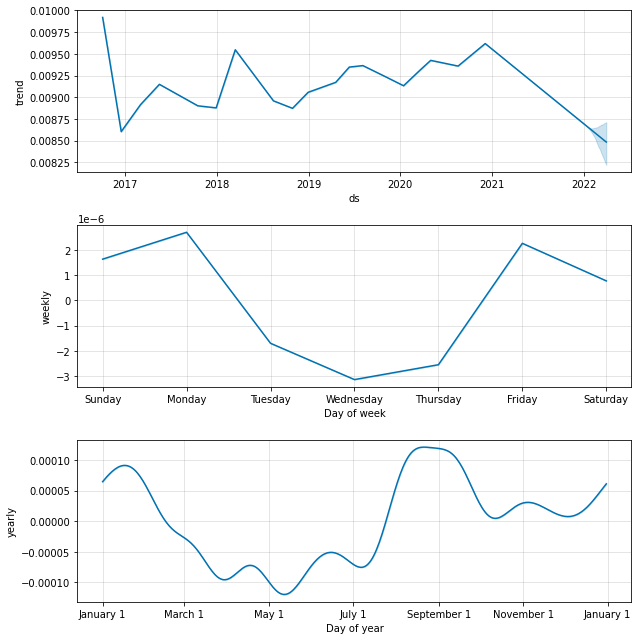

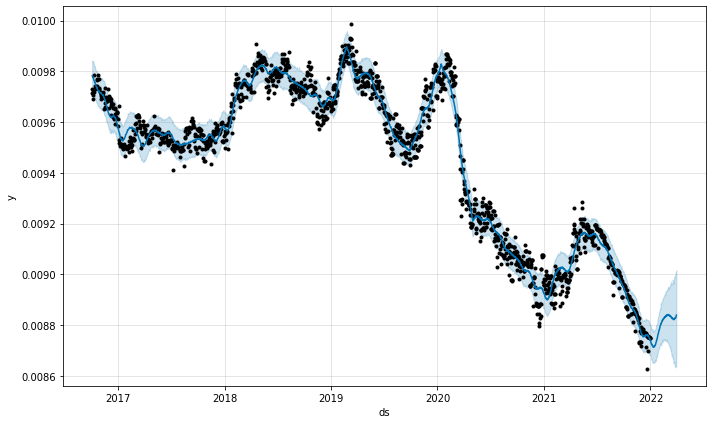

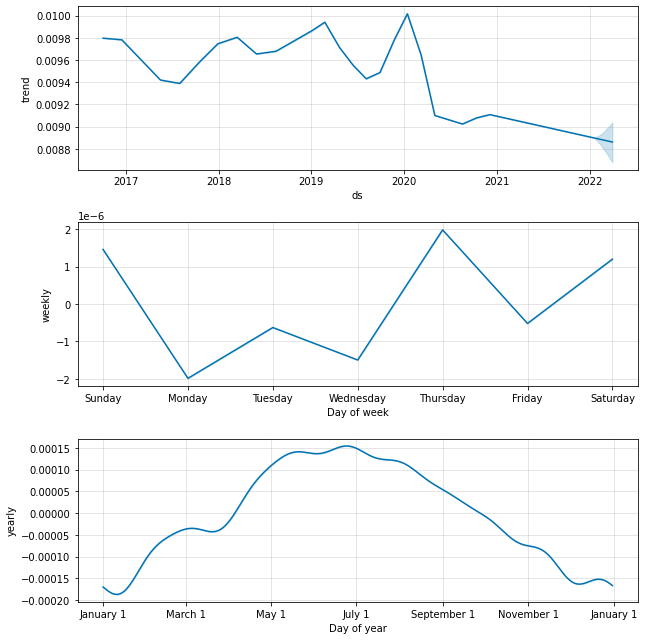

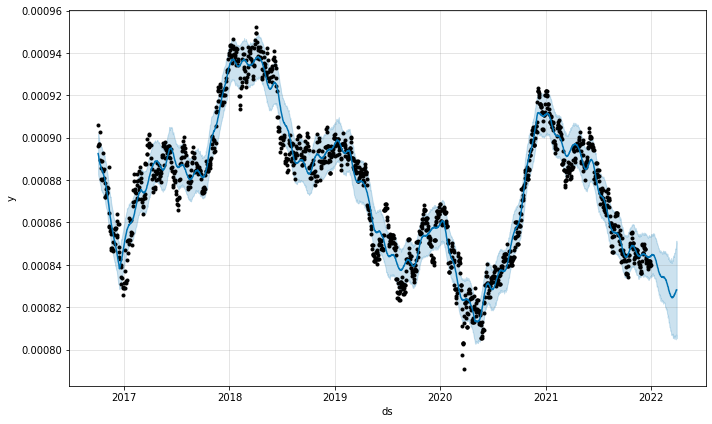

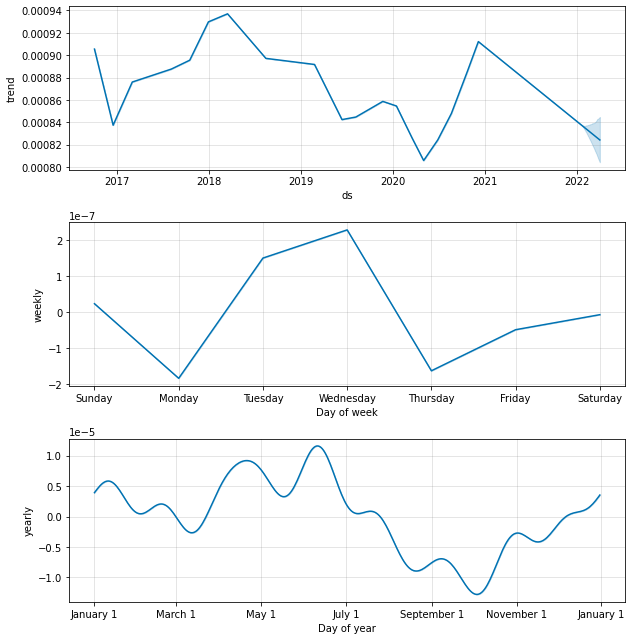

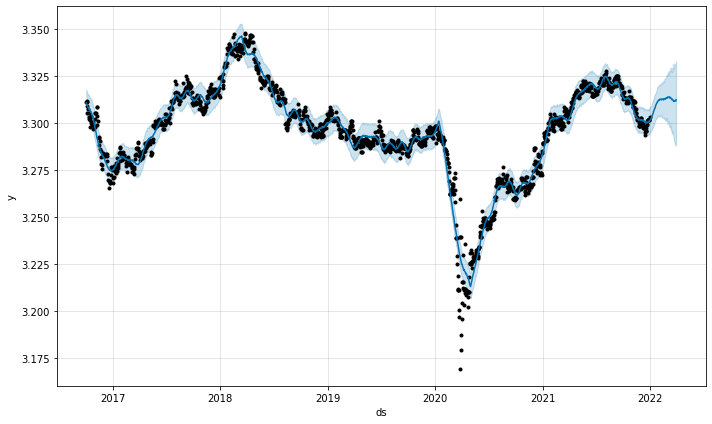

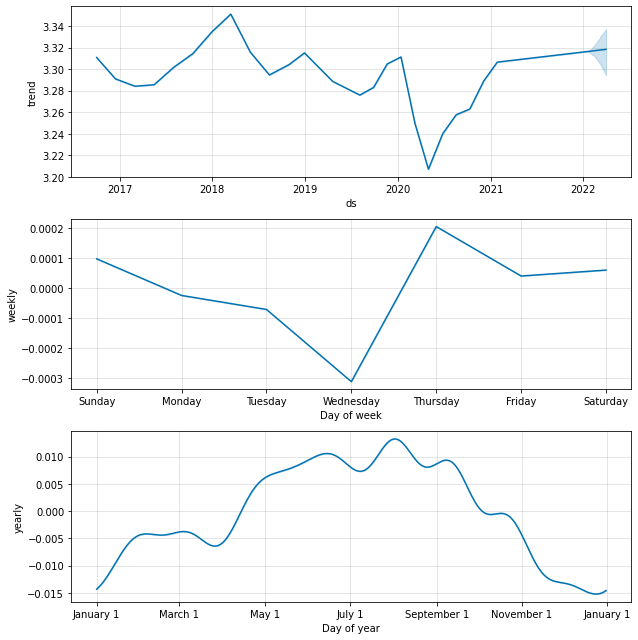

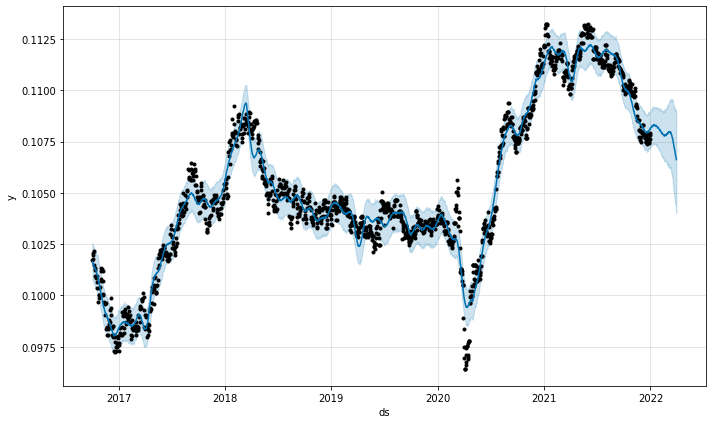

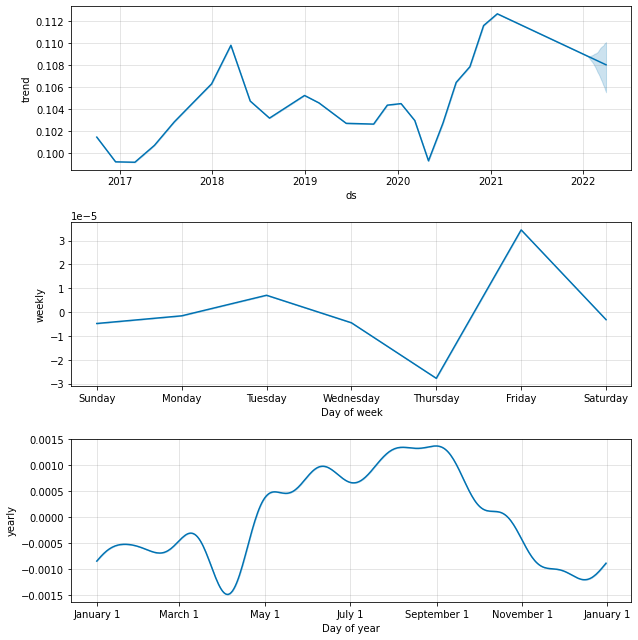

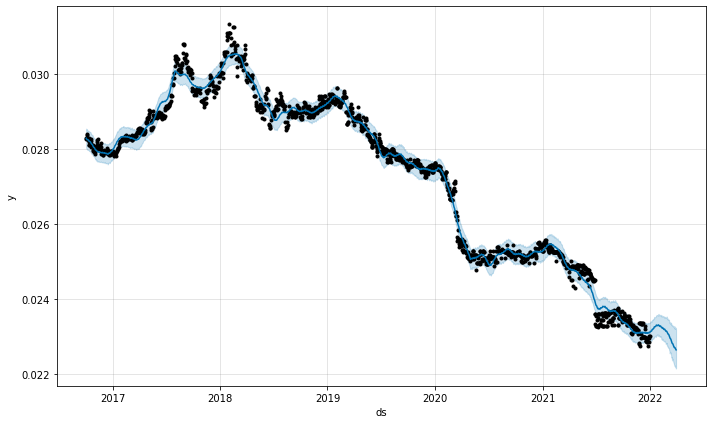

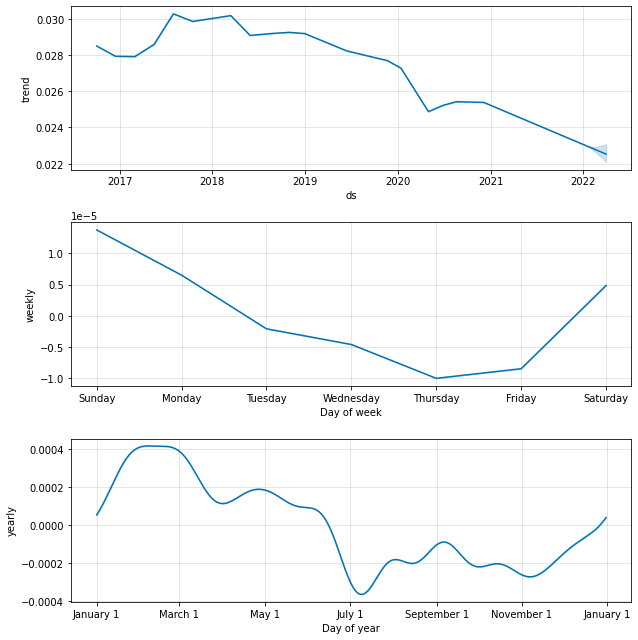

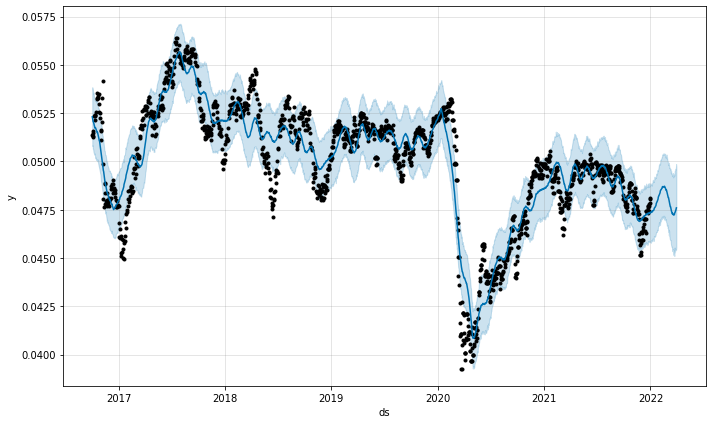

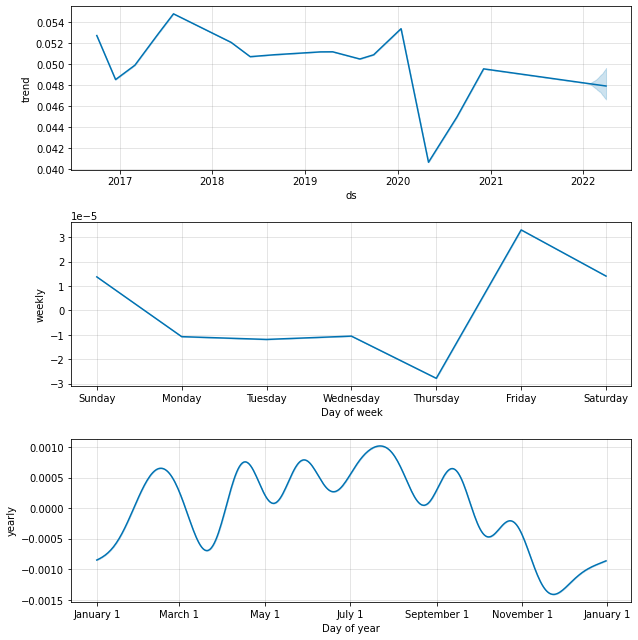

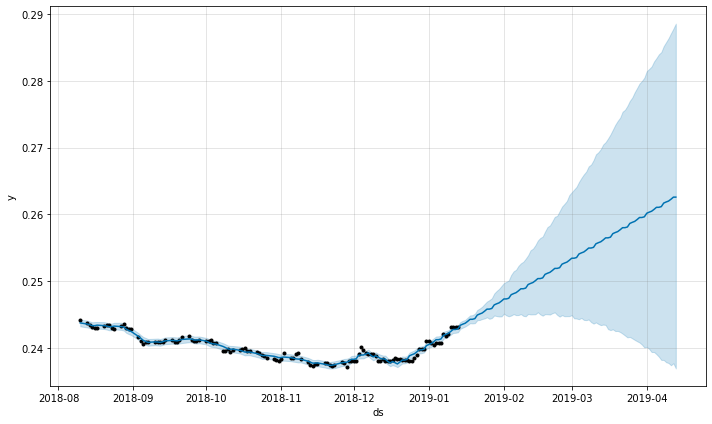

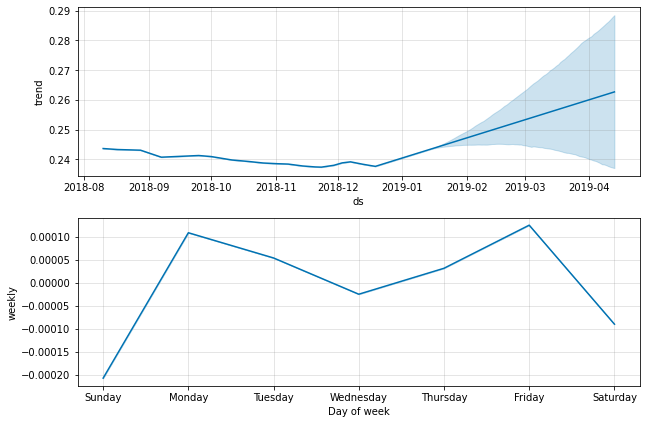

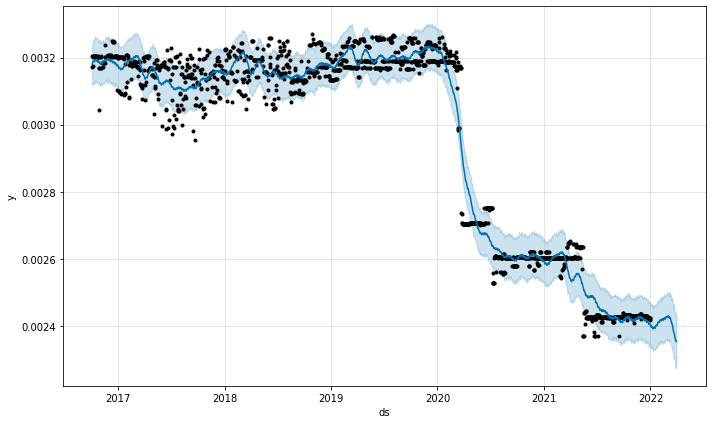

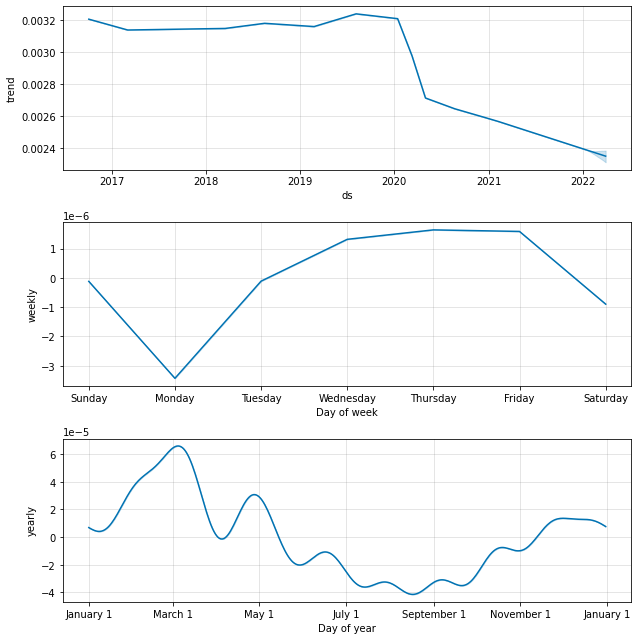

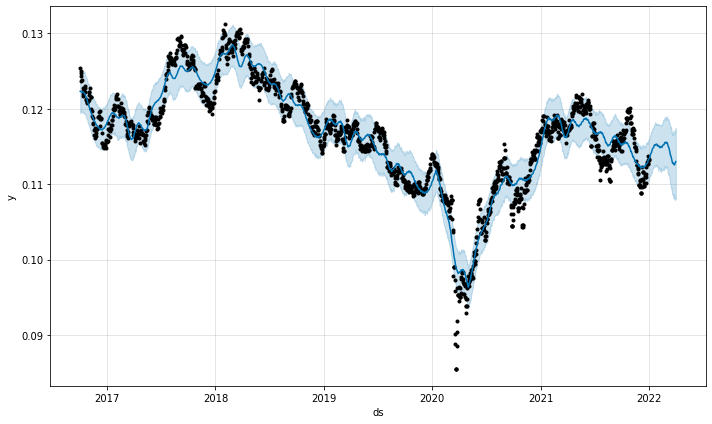

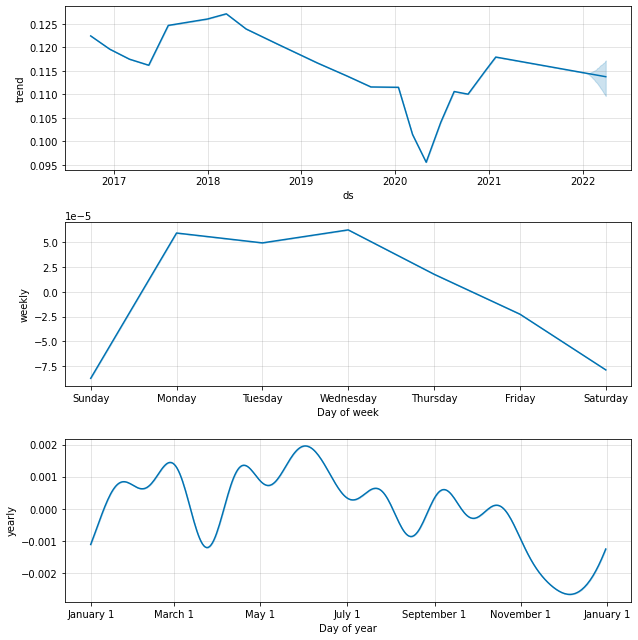

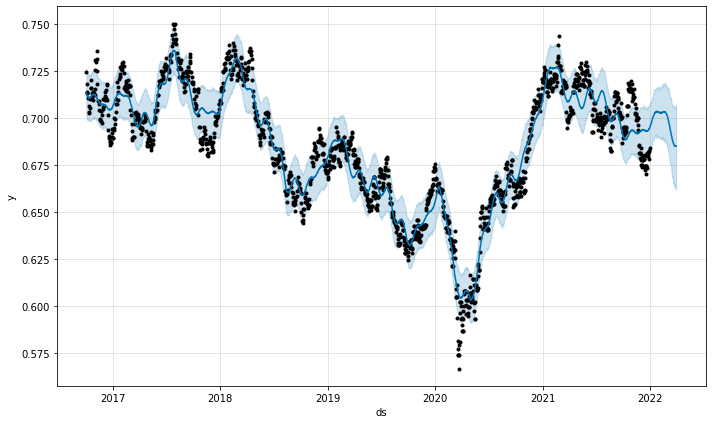

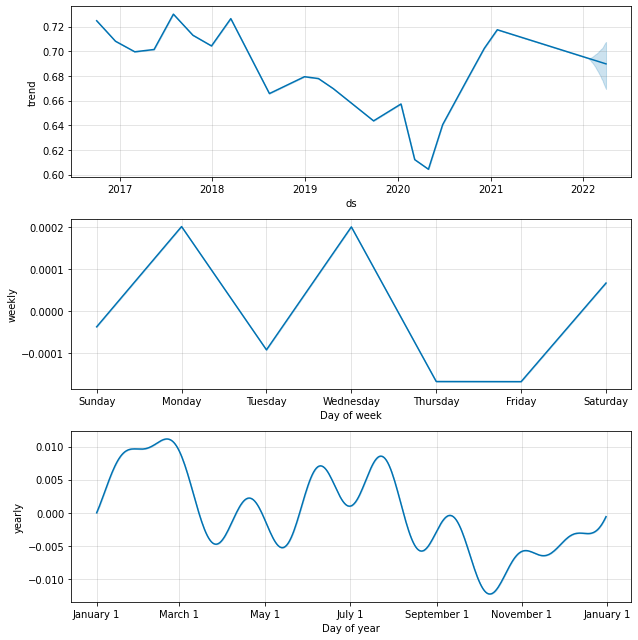

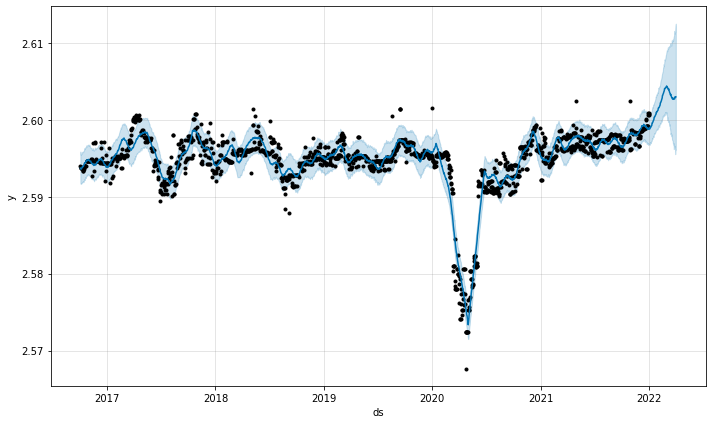

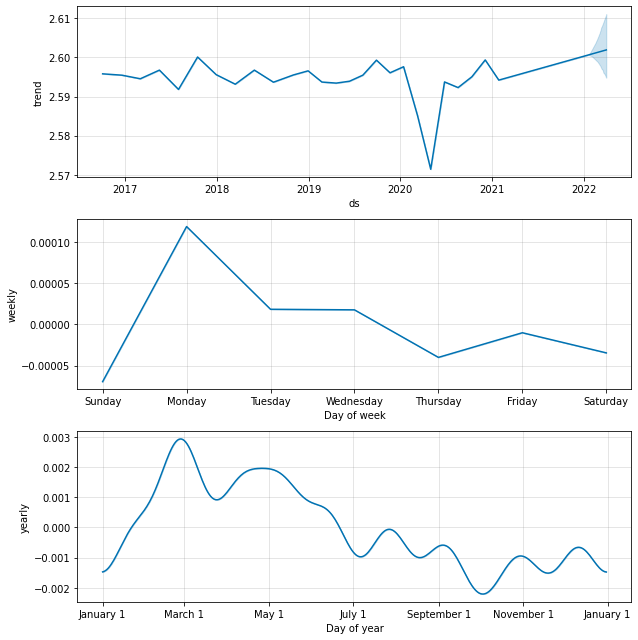

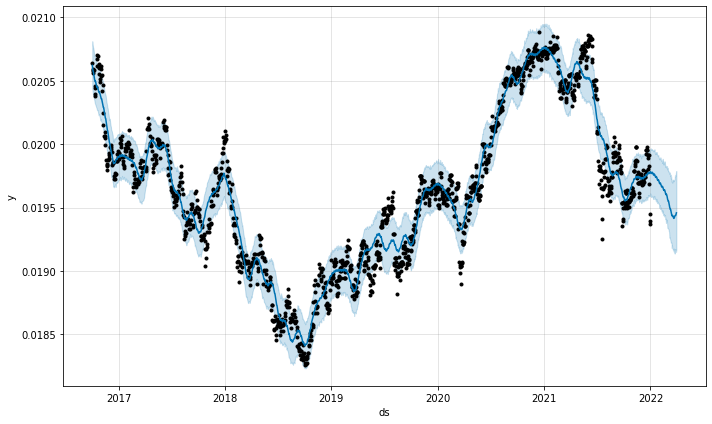

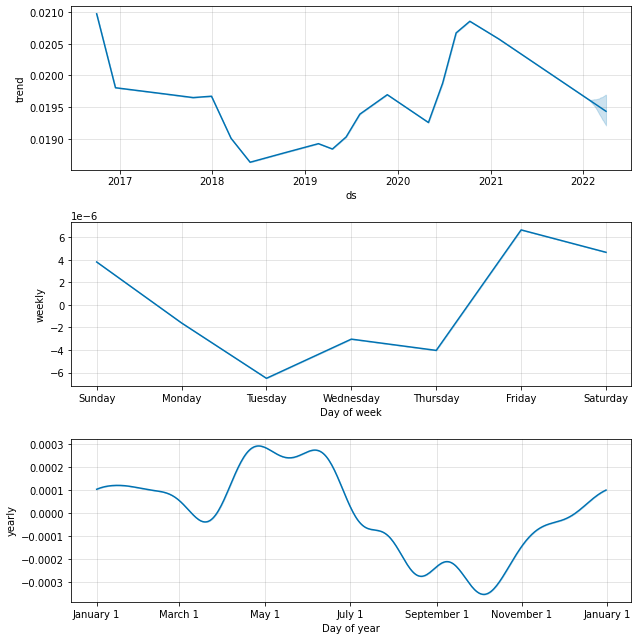

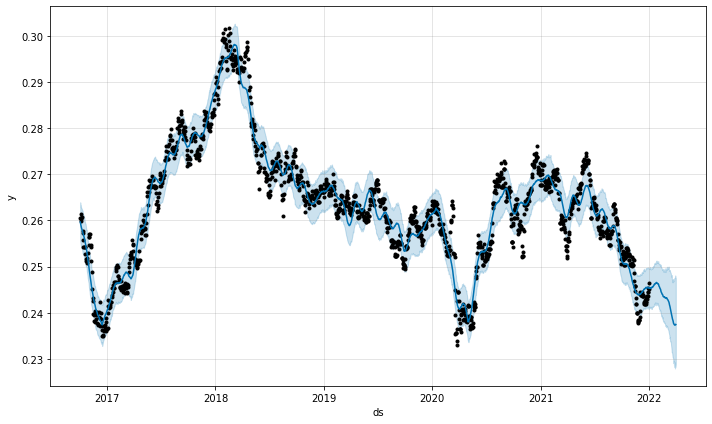

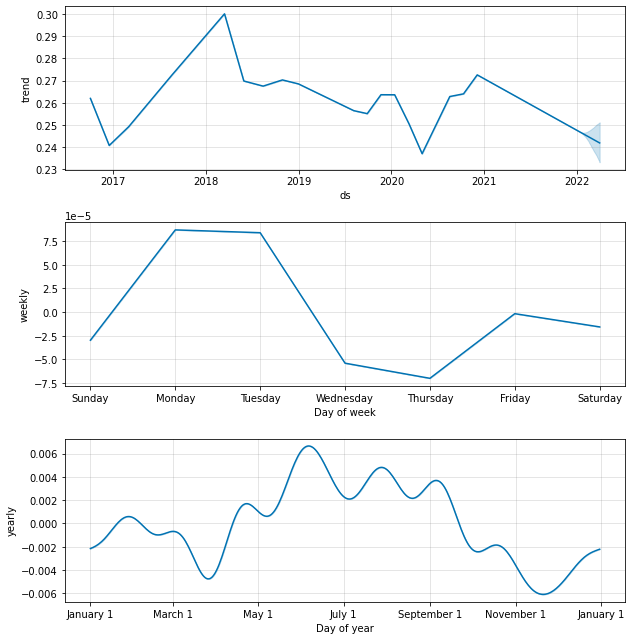

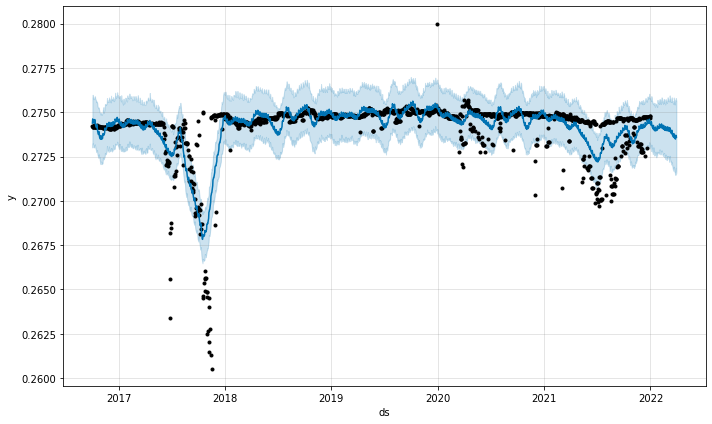

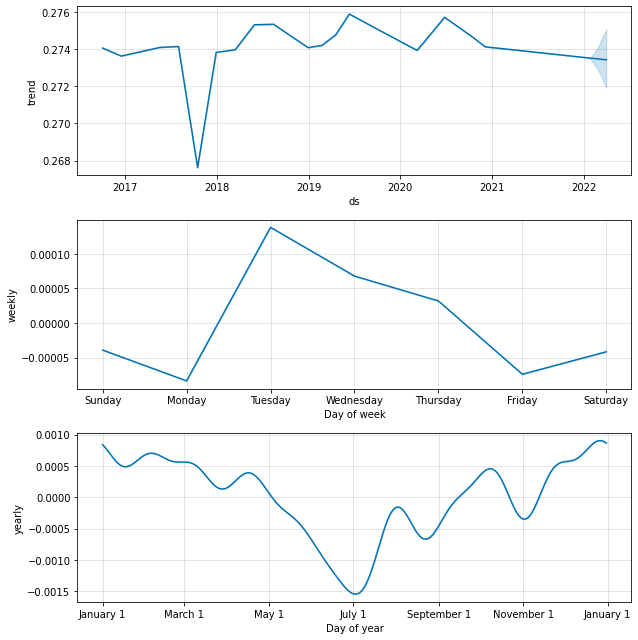

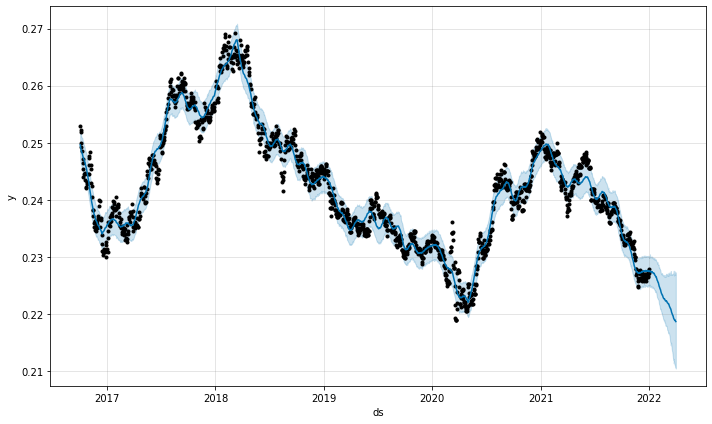

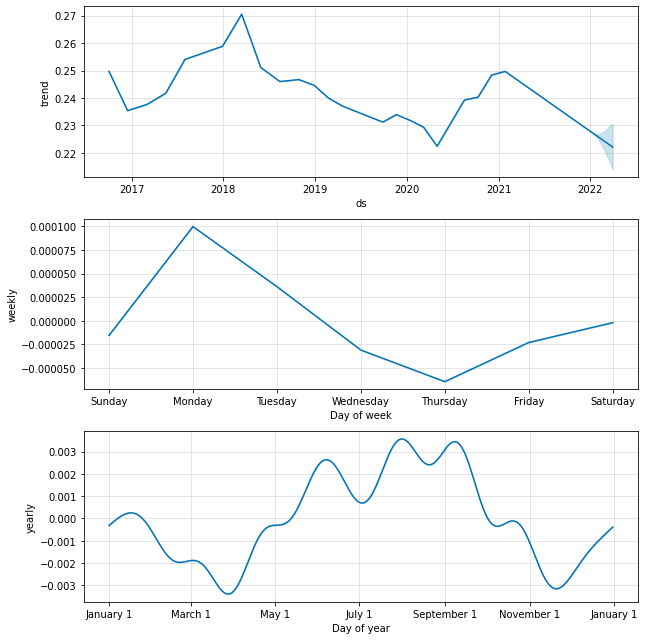

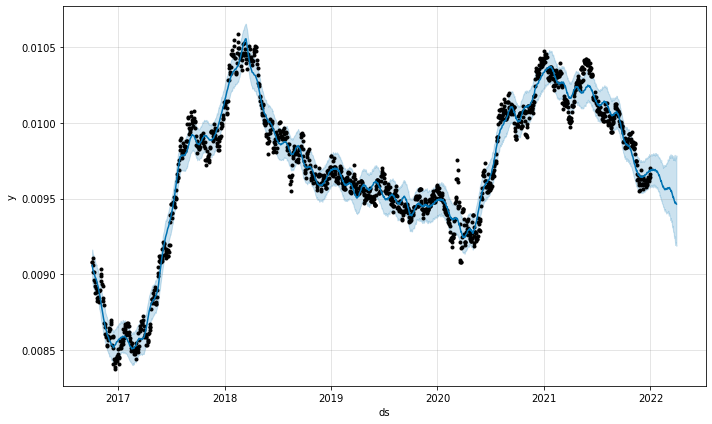

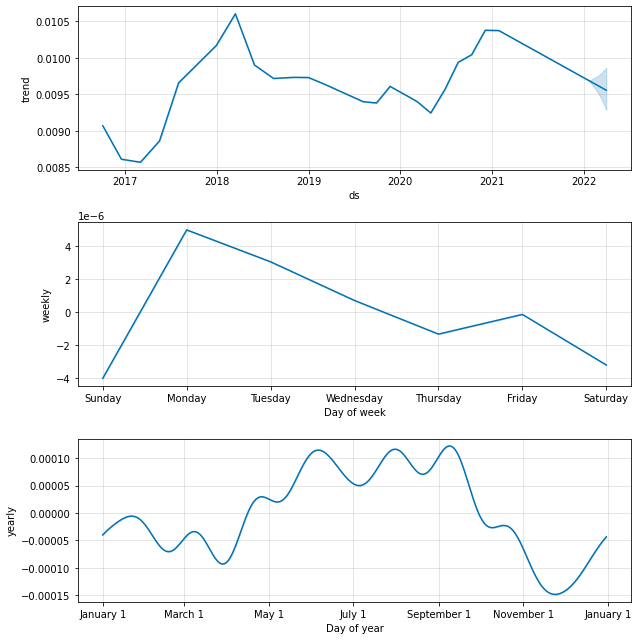

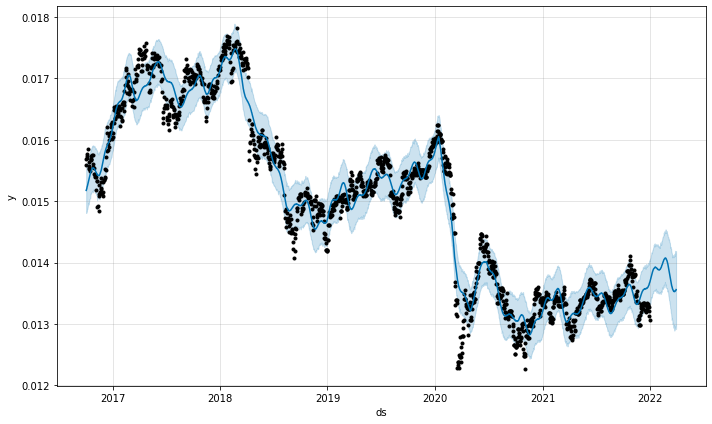

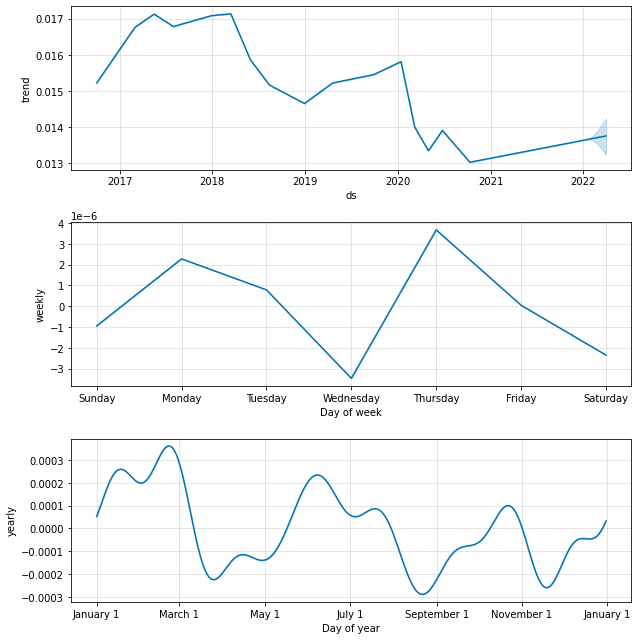

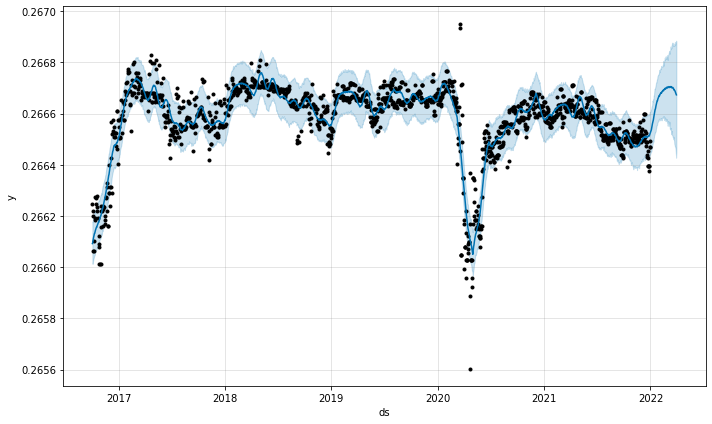

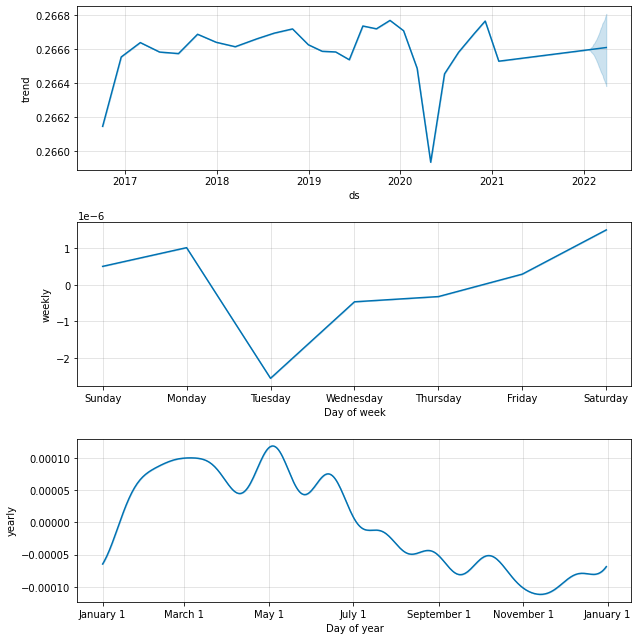

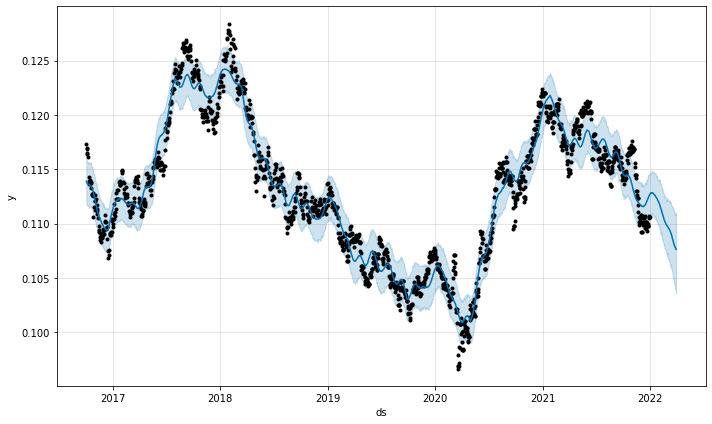

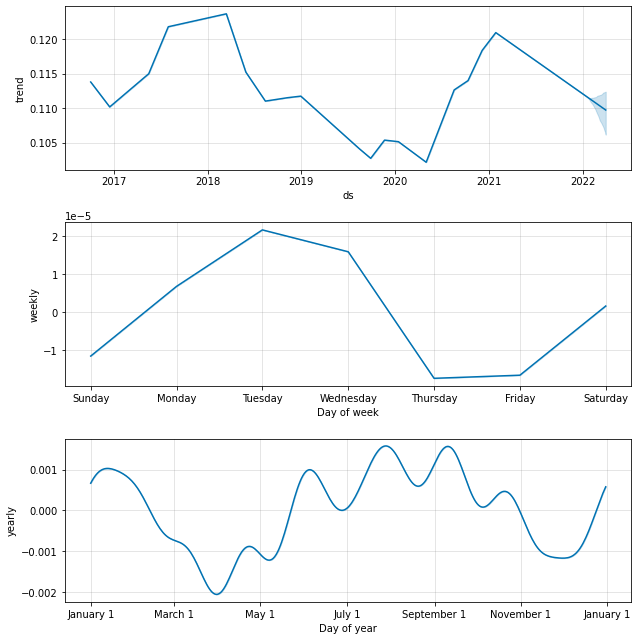

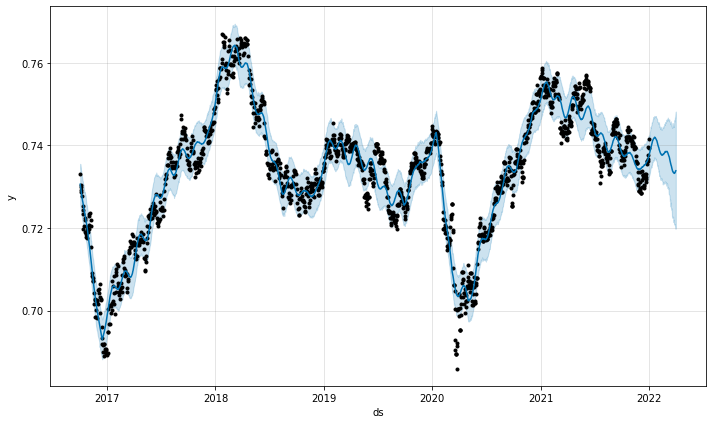

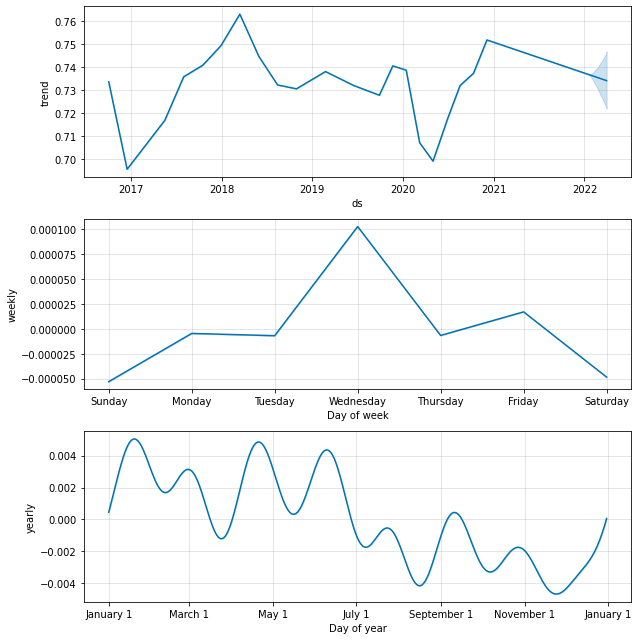

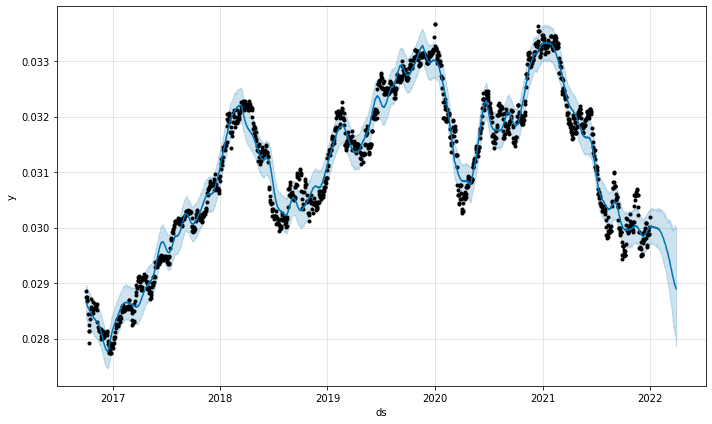

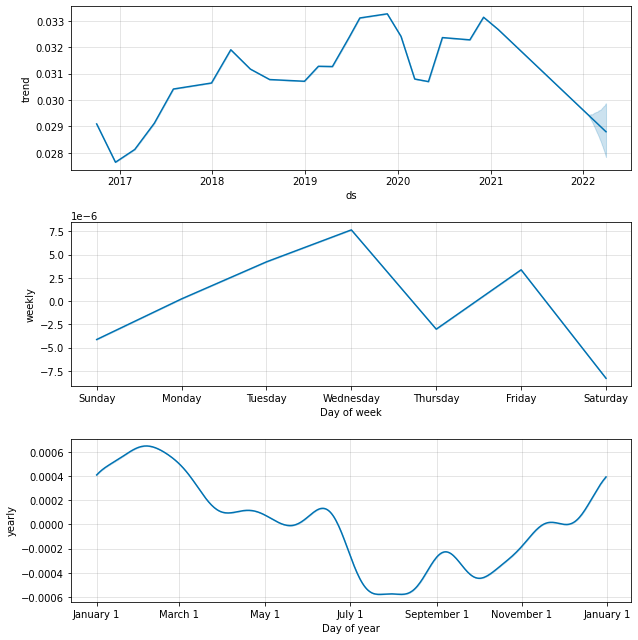

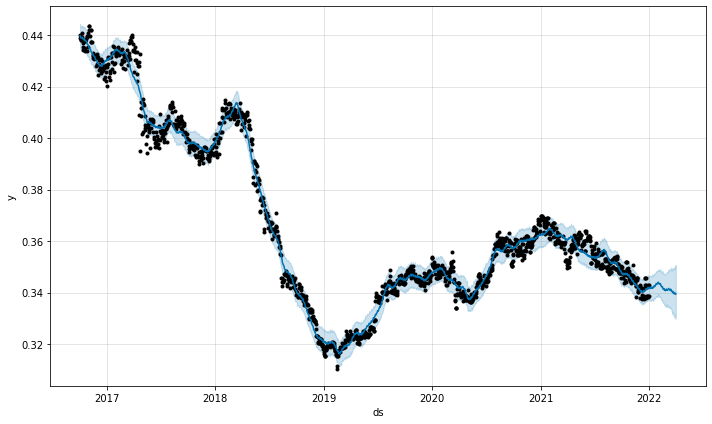

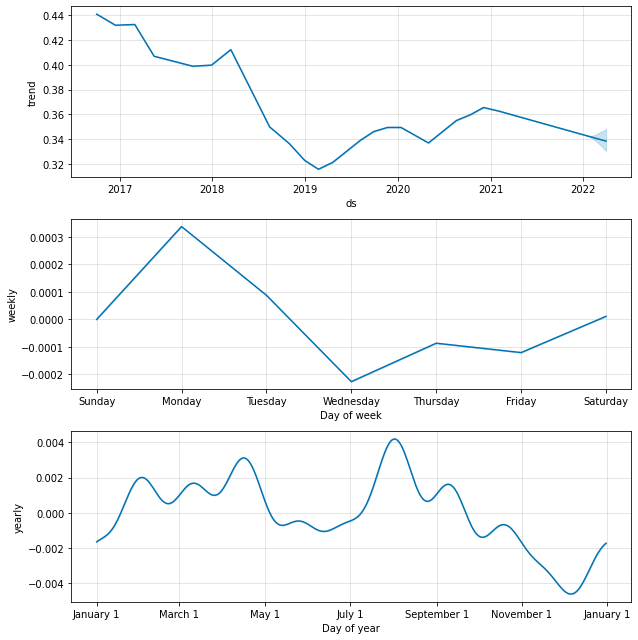

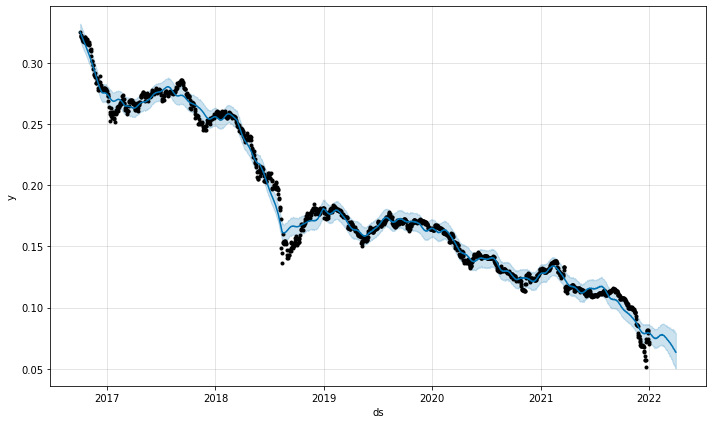

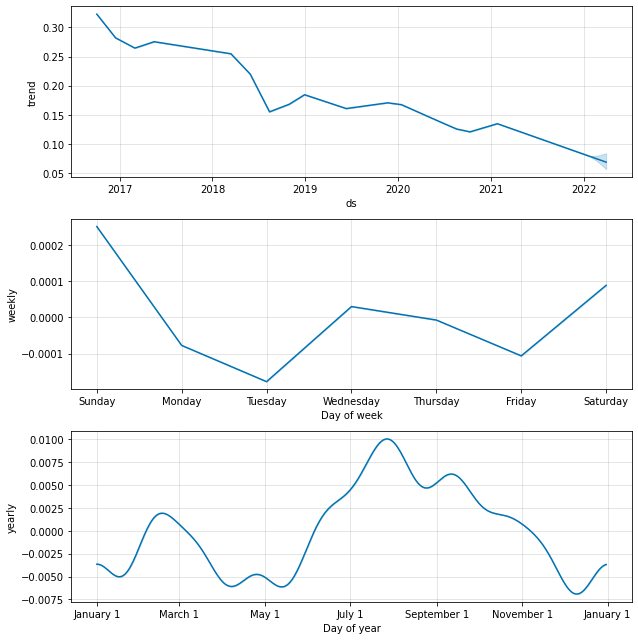

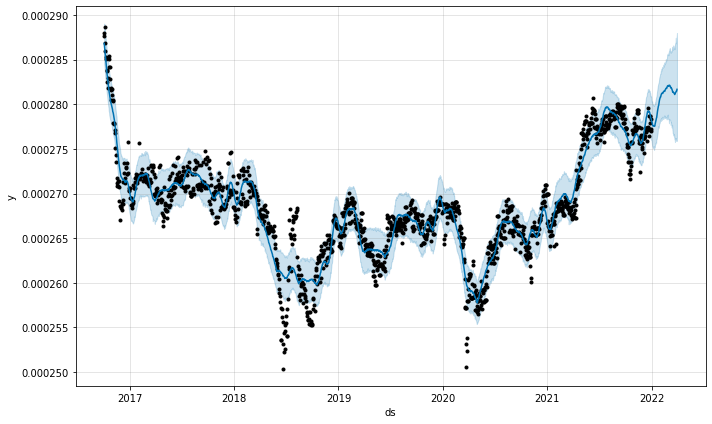

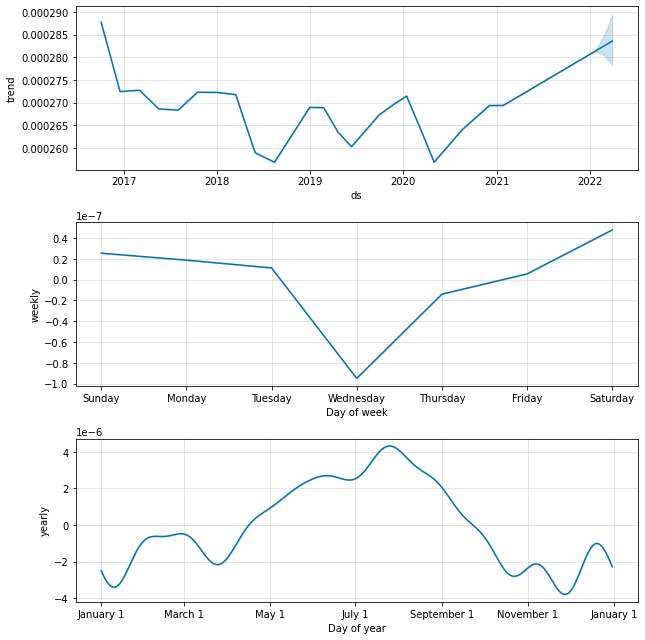

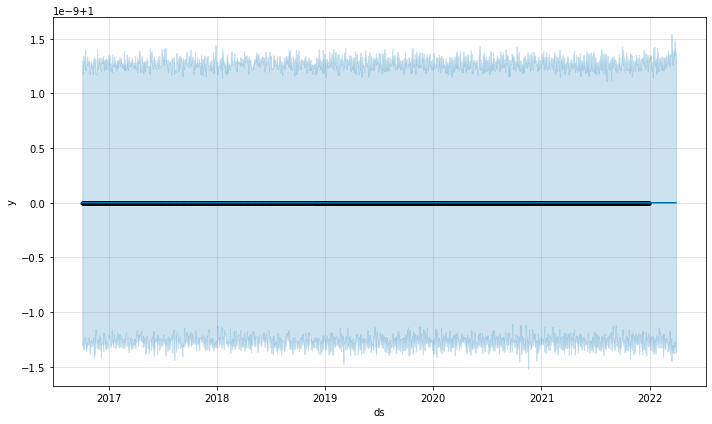

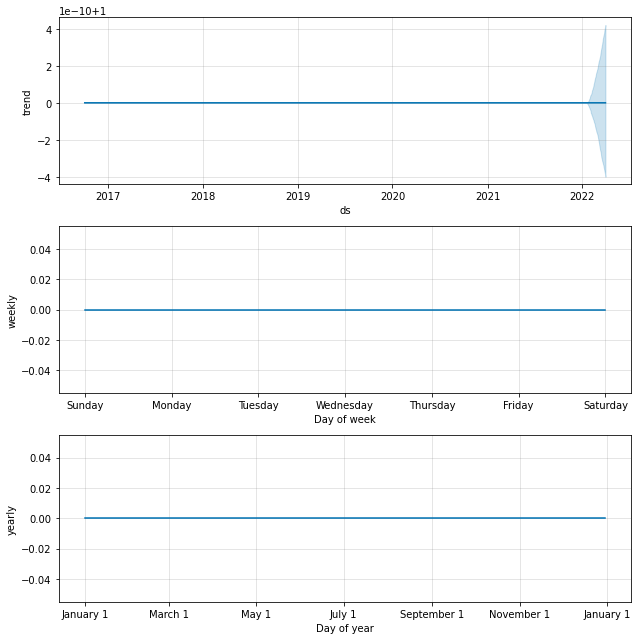

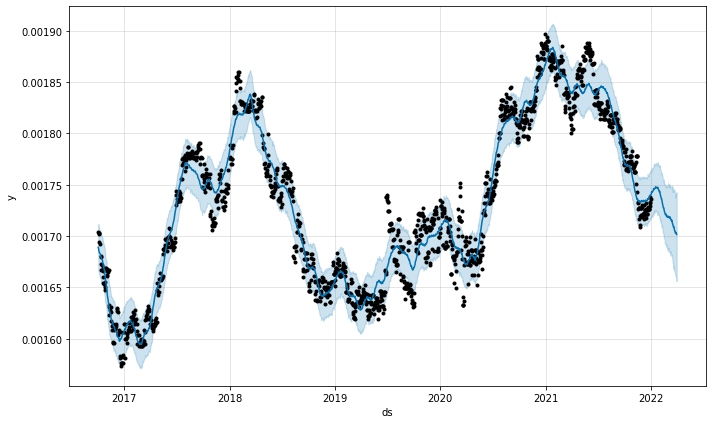

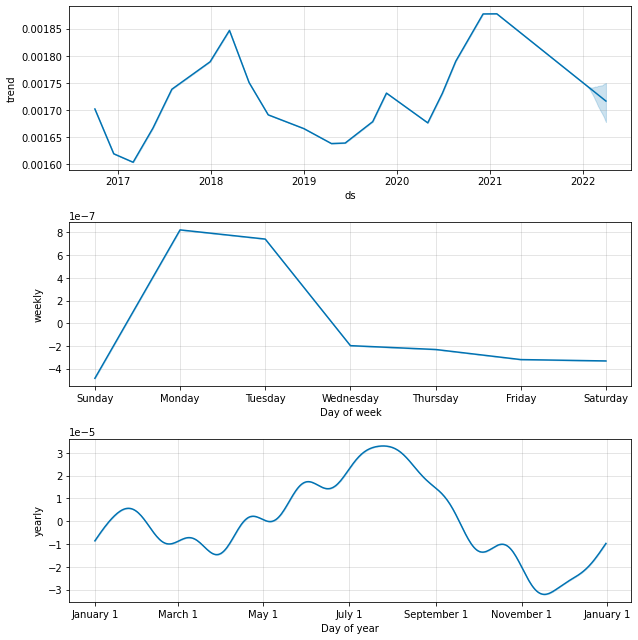

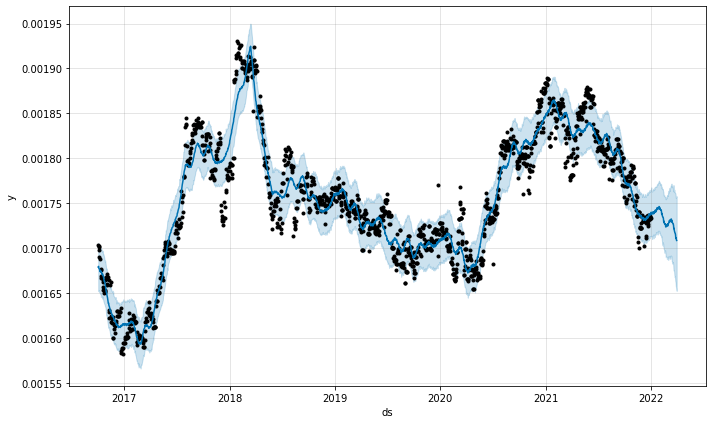

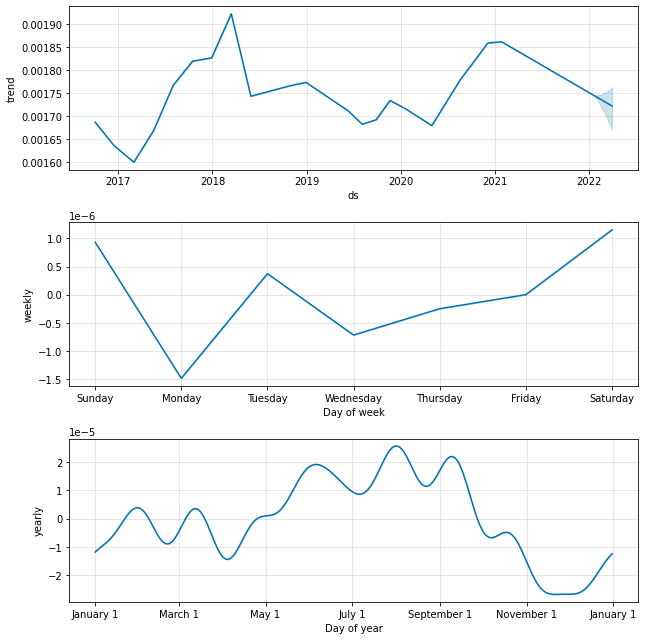

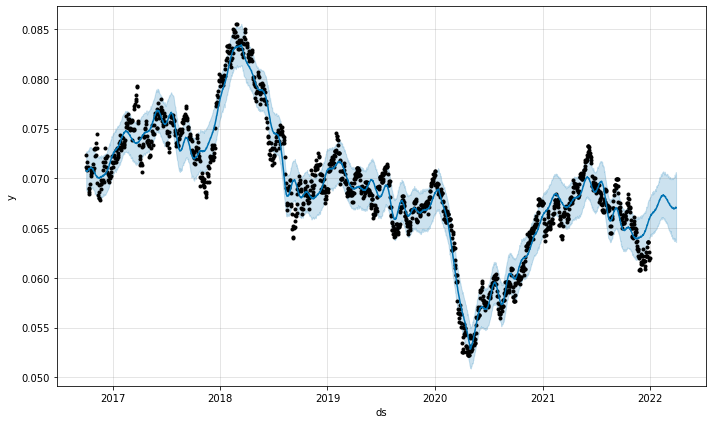

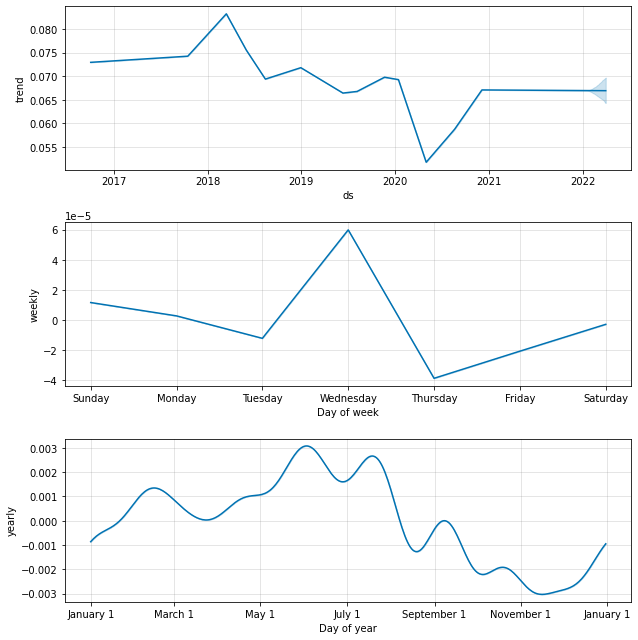

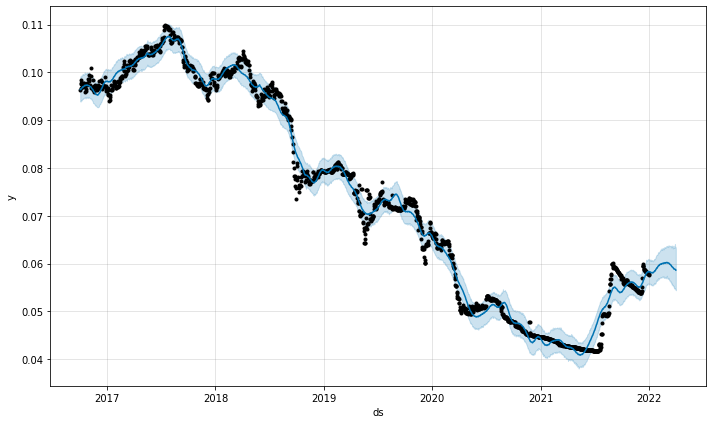

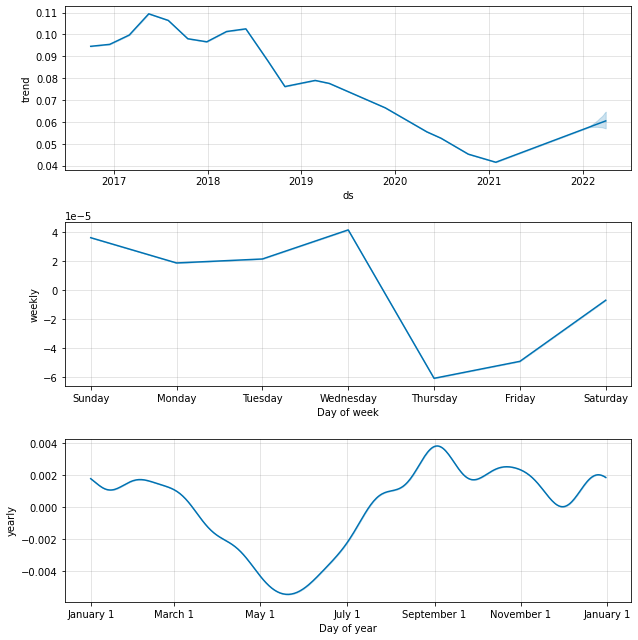

In [ ]:
for currency in columns:
    globals()[f"currency_rates_{currency}"]
    print(globals()[f"currency_rates_{currency}"])
    globals()[f"currency_rates_{currency}"] = globals()[f"currency_rates_{currency}"].drop(['rate_type', 'length_in_months', 'currency'], axis=1)
    
    # Printing the updated DataFrame
    print(currency)
    # print(globals()[f"currency_rates_{currency}"]) #testcode

    # Renaming columns to 'ds' and 'y' for Prophet
    globals()[f"currency_rates_{currency}"] = globals()[f"currency_rates_{currency}"].rename(columns={'date': 'ds', 'rate': 'y'})

    # Creating and fitting Prophet model
    m = Prophet()
    m.fit(globals()[f"currency_rates_{currency}"])

    # Creating future dataframe for forecasting
    future = m.make_future_dataframe(periods=90) #making 3 months of forecast

    # Generating forecasts
    forecast = m.predict(future)

    # Plot forecasts
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)

    # Save forecast figures to folder
    fig1.savefig(f"{folder}/forecast_{currency}.png")
    fig2.savefig(f"{folder}/components_{currency}.png")